In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import glob
plt.rcParams.update({'mathtext.default':'regular'})

### Read in csv files and clean data

In [32]:
logit_standard_df = pd.read_csv('Logit Parameters, Random, Standard.csv',skiprows=6)
logit_standard_df.drop(['%-Random-Inspections', 'Inspection-Strategy', 'Enforcement-Strategy',
                                  '#-Inspectors','%-Escalate','avg-violations-conscious', '%-Criminal-Offenders',
                                  '#-Inspections-per-Inspector', '%-Unintentional-Offenders',
                                  '%-Conscious-Offenders', 'avg-violations-unintentional',
                                  'radius-of-peers', 'length-of-run',
                                  '%-Deescalate', 'React-to-Inspections', '#-Inspectees',
                                  'React-to-Peer-Pressure', 'React-to-Enforcement',
                                  'avg-violations-criminal', '%-Compliant-Inspectees'], inplace=True, axis=1)
logit_standard_df = logit_standard_df.rename(columns={'[step]': 'step', '[run number]':'run','logit-normal-mu':'mu', 'logit-normal-sigma':'sigma'})
logit_standard_df['total-inspectees'] = logit_standard_df['#-compliant-inspectees'] + logit_standard_df['#-unintentional-violators'] + logit_standard_df['#-conscious-violators'] + logit_standard_df['#-criminal-violators'] 
logit_standard_df['perc-compliant'] = logit_standard_df['#-compliant-inspectees'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-compliant'] = logit_standard_df['perc-compliant'].fillna(0)
logit_standard_df['perc-unintentional'] = logit_standard_df['#-unintentional-violators'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-unintentional'] = logit_standard_df['perc-unintentional'].fillna(0)
logit_standard_df['perc-conscious'] = logit_standard_df['#-conscious-violators'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-conscious'] = logit_standard_df['perc-conscious'].fillna(0)
logit_standard_df['perc-criminal'] = logit_standard_df['#-criminal-violators'] / logit_standard_df['total-inspectees'] * 100
logit_standard_df['perc-criminal'] = logit_standard_df['perc-criminal'].fillna(0)
logit_standard_df['perc-noncompliant'] = (logit_standard_df['perc-unintentional'] + logit_standard_df['perc-conscious'] + logit_standard_df['perc-criminal']) 

In [7]:
logit_standard_df.columns

Index(['run', 'logit-normal-mu', 'logit-normal-sigma', 'step',
       'avg-compliance-rate', '#-compliant-inspectees',
       '#-unintentional-violators', '#-conscious-violators',
       '#-criminal-violators',
       'count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count insp

In [33]:
logit_standard_df['sum-absorb-inspectees'] = (logit_standard_df['count inspectees with [absorbance-capacity < .1]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]'] +
logit_standard_df['count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]'] +
logit_standard_df['count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]'] +
logit_standard_df['count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]'] + 
logit_standard_df['count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]'] +
logit_standard_df['count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'] )
logit_standard_df['perc-1'] = logit_standard_df['count inspectees with [absorbance-capacity < .1]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-12'] = logit_standard_df['count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]'] / logit_standard_df['sum-absorb-inspectees'] * 100 
logit_standard_df['perc-23'] = logit_standard_df['count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-34'] = logit_standard_df['count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-45'] = logit_standard_df['count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-56'] = logit_standard_df['count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-67'] = logit_standard_df['count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-78'] = logit_standard_df['count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-89'] = logit_standard_df['count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df['perc-91'] = logit_standard_df['count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]'] / logit_standard_df['sum-absorb-inspectees'] * 100
logit_standard_df.drop(['count inspectees with [absorbance-capacity < .1]',
       'count inspectees with [absorbance-capacity < .2 and absorbance-capacity >= .1]',
       'count inspectees with [absorbance-capacity < .3 and absorbance-capacity >= .2]',
       'count inspectees with [absorbance-capacity < .4 and absorbance-capacity >= .3]',
       'count inspectees with [absorbance-capacity < .5 and absorbance-capacity >= .4]',
       'count inspectees with [absorbance-capacity < .6 and absorbance-capacity >= .5]',
       'count inspectees with [absorbance-capacity < .7 and absorbance-capacity >= .6]',
       'count inspectees with [absorbance-capacity < .8 and absorbance-capacity >= .7]',
       'count inspectees with [absorbance-capacity < .9 and absorbance-capacity >= .8]',
       'count inspectees with [absorbance-capacity <= 1 and absorbance-capacity >= .9]',
                       'total-inspectees','sum-absorb-inspectees'], inplace=True, axis=1)

In [35]:
logit_standard_df

Index(['run', 'mu', 'sigma', 'step', 'avg-compliance-rate',
       '#-compliant-inspectees', '#-unintentional-violators',
       '#-conscious-violators', '#-criminal-violators', 'perc-compliant',
       'perc-unintentional', 'perc-conscious', 'perc-criminal',
       'perc-noncompliant', 'perc-1', 'perc-12', 'perc-23', 'perc-34',
       'perc-45', 'perc-56', 'perc-67', 'perc-78', 'perc-89', 'perc-91'],
      dtype='object')

In [67]:
agg_summary_logit_standard_avg = logit_standard_df.groupby(['mu', 'sigma'], as_index=False).mean()
agg_summary_logit_standard_avg.drop(['run','step'], inplace=True, axis=1)
agg_summary_logit_standard_avg = agg_summary_logit_standard_avg.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-mean', 
                                                                                'perc-compliant':'perc-compliant-mean', 
                                                                                'perc-unintentional':'perc-unintentional-mean',
                                                                               'perc-conscious': 'perc-conscious-mean',
                                                                               'perc-criminal': 'perc-criminal-mean',
                                                                               'perc-noncompliant': 'perc-noncompliant-mean',
                                                                               'perc-1':'perc-1-mean', 
                                                                                'perc-12':'perc-12-mean', 
                                                                                'perc-23':'perc-23-mean', 
                                                                                'perc-34':'perc-34-mean',
                                                                                'perc-45':'perc-45-mean', 
                                                                                'perc-56':'perc-56-mean', 
                                                                                'perc-67':'perc-67-mean', 
                                                                                'perc-78':'perc-78-mean', 
                                                                                'perc-89':'perc-89-mean', 
                                                                                'perc-91':'perc-91-mean'})
agg_summary_logit_standard_avg['index'] = ((agg_summary_logit_standard_avg['mu'] * 10).astype('int')).astype('str') + "-" + ((agg_summary_logit_standard_avg['sigma'] * 10).astype('int')).astype('str')                                                                                  
agg_summary_logit_standard_avg = agg_summary_logit_standard_avg.set_index('index')
agg_summary_logit_standard_avg

,mu,sigma,avg-compliance-rate-mean,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-mean,perc-unintentional-mean,perc-conscious-mean,...,perc-1-mean,perc-12-mean,perc-23-mean,perc-34-mean,perc-45-mean,perc-56-mean,perc-67-mean,perc-78-mean,perc-89-mean,perc-91-mean
index,,,,,,,,,,,,,,,,,,,,,
0-0,0.0,0.0,4.495900,261.658442,102.360240,7463.624176,42.484615,3.321393,1.299321,94.740104,...,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
0-1,0.0,0.1,98.336479,7854.471229,1.412488,14.084316,0.159241,99.701351,0.017933,0.178794,...,0.000000,0.000000,0.000000,0.003808,49.988576,50.006347,0.001269,0.000000,0.000000,0.000000
0-2,0.0,0.2,98.480551,7856.711189,1.376723,11.879920,0.159740,99.729782,0.017479,0.150811,...,0.000000,0.000000,0.001269,2.168063,47.892866,47.847169,2.088093,0.002539,0.000000,0.000000
0-3,0.0,0.3,98.489880,7856.952647,1.358342,11.659840,0.156843,99.732846,0.017245,0.148017,...,0.000000,0.000000,0.256410,8.681137,41.155116,41.232546,8.450114,0.224676,0.000000,0.000000
0-4,0.0,0.4,98.408344,7855.398701,1.382418,13.188212,0.158242,99.713121,0.017551,0.167418,...,0.000000,0.021579,1.751714,13.970551,34.433866,34.437675,13.693831,1.665397,0.025387,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-6,1.0,0.6,12.393318,893.935265,88.099401,6853.651449,34.441658,11.347247,1.118300,86.997365,...,0.000000,0.002539,0.110434,0.880934,3.811881,11.374714,23.790302,34.306931,23.470424,2.251841
10-7,1.0,0.7,17.470331,1314.568132,79.971329,6445.832468,29.755844,16.686582,1.015125,81.820684,...,0.000000,0.022848,0.378269,1.834222,5.392232,12.146484,21.829144,29.459254,24.597614,4.339934
10-8,1.0,0.8,20.943982,1626.738661,74.058541,6142.811489,26.518981,20.649143,0.940071,77.974264,...,0.005077,0.139629,0.883473,2.914445,6.497842,12.400355,19.496065,26.057375,24.757553,6.848185


In [68]:
agg_summary_logit_standard_std = logit_standard_df.groupby(['mu', 'sigma'], as_index=False).std()
agg_summary_logit_standard_std.drop(['run','step'], inplace=True, axis=1)
agg_summary_logit_standard_std = agg_summary_logit_standard_std.rename(columns={'avg-compliance-rate': 'avg-compliance-rate-std', 
                                                                                'perc-compliant':'perc-compliant-std', 
                                                                                'perc-unintentional':'perc-unintentional-std',
                                                                               'perc-conscious': 'perc-conscious-std',
                                                                               'perc-criminal': 'perc-criminal-std',
                                                                               'perc-noncompliant': 'perc-noncompliant-std',
                                                                               'perc-1':'perc-1-std', 
                                                                                'perc-12':'perc-12-std', 
                                                                                'perc-23':'perc-23-std', 
                                                                                'perc-34':'perc-34-std',
                                                                                'perc-45':'perc-45-std', 
                                                                                'perc-56':'perc-56-std', 
                                                                                'perc-67':'perc-67-std', 
                                                                                'perc-78':'perc-78-std', 
                                                                                'perc-89':'perc-89-std', 
                                                                                'perc-91':'perc-91-std'})
agg_summary_logit_standard_std['index'] = ((agg_summary_logit_standard_std['mu'] * 10).astype('int')).astype('str') + "-" + ((agg_summary_logit_standard_std['sigma'] * 10).astype('int')).astype('str')                                                                                  
agg_summary_logit_standard_std = agg_summary_logit_standard_std.set_index('index')
agg_summary_logit_standard_std

,mu,sigma,avg-compliance-rate-std,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-std,perc-unintentional-std,perc-conscious-std,...,perc-1-std,perc-12-std,perc-23-std,perc-34-std,perc-45-std,perc-56-std,perc-67-std,perc-78-std,perc-89-std,perc-91-std
index,,,,,,,,,,,,,,,,,,,,,
0-0,0.0,0.0,3.611900,304.709767,29.559089,388.643245,5.180508,3.867958,0.375307,4.933141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0-1,0.0,0.1,7.172941,318.836032,31.973881,169.935651,4.234841,4.046981,0.405962,2.157371,...,0.000000,0.000000,0.000000,0.005817,0.538942,0.536509,0.003808,0.000000,0.000000,0.000000
0-2,0.0,0.2,7.023649,311.974732,31.996938,157.147349,4.248472,3.959904,0.406254,1.995044,...,0.000000,0.000000,0.003808,0.116455,0.362575,0.348719,0.191951,0.005078,0.000000,0.000000
0-3,0.0,0.3,7.021956,310.849778,31.911491,155.266179,4.239717,3.945629,0.405170,1.971166,...,0.000000,0.000000,0.068313,0.250848,0.289628,0.484847,0.320943,0.037248,0.000000,0.000000
0-4,0.0,0.4,7.078532,314.604910,31.950660,162.338534,4.239900,3.993290,0.405667,2.060935,...,0.000000,0.019707,0.177991,0.482888,0.402190,0.437941,0.470741,0.139151,0.024086,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-6,1.0,0.6,5.728130,485.451462,30.699388,526.025417,6.303403,6.162163,0.389779,6.677070,...,0.000000,0.005078,0.031120,0.110840,0.149991,0.328947,0.389727,0.448091,0.454197,0.172305
10-7,1.0,0.7,5.687874,489.879517,30.928969,523.566495,6.290002,6.218361,0.392693,6.645867,...,0.000000,0.009499,0.052891,0.124410,0.245153,0.424885,0.492530,0.528720,0.576429,0.225404
10-8,1.0,0.8,8.247895,693.220806,31.662686,706.972096,7.193839,8.799474,0.402005,8.973961,...,0.008420,0.039332,0.075571,0.144647,0.191127,0.189858,0.458767,0.428486,0.495601,0.345192


In [70]:
agg_summary_logit_standard = pd.concat([agg_summary_logit_standard_avg, agg_summary_logit_standard_std], axis=1)
#agg_summary_logit_standard.to_csv('agg_summary_logit_standard.csv')
agg_summary_logit_standard

,mu,sigma,avg-compliance-rate-mean,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-mean,perc-unintentional-mean,perc-conscious-mean,...,perc-1-std,perc-12-std,perc-23-std,perc-34-std,perc-45-std,perc-56-std,perc-67-std,perc-78-std,perc-89-std,perc-91-std
index,,,,,,,,,,,,,,,,,,,,,
0-0,0.0,0.0,4.495900,261.658442,102.360240,7463.624176,42.484615,3.321393,1.299321,94.740104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0-1,0.0,0.1,98.336479,7854.471229,1.412488,14.084316,0.159241,99.701351,0.017933,0.178794,...,0.000000,0.000000,0.000000,0.005817,0.538942,0.536509,0.003808,0.000000,0.000000,0.000000
0-2,0.0,0.2,98.480551,7856.711189,1.376723,11.879920,0.159740,99.729782,0.017479,0.150811,...,0.000000,0.000000,0.003808,0.116455,0.362575,0.348719,0.191951,0.005078,0.000000,0.000000
0-3,0.0,0.3,98.489880,7856.952647,1.358342,11.659840,0.156843,99.732846,0.017245,0.148017,...,0.000000,0.000000,0.068313,0.250848,0.289628,0.484847,0.320943,0.037248,0.000000,0.000000
0-4,0.0,0.4,98.408344,7855.398701,1.382418,13.188212,0.158242,99.713121,0.017551,0.167418,...,0.000000,0.019707,0.177991,0.482888,0.402190,0.437941,0.470741,0.139151,0.024086,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10-6,1.0,0.6,12.393318,893.935265,88.099401,6853.651449,34.441658,11.347247,1.118300,86.997365,...,0.000000,0.005078,0.031120,0.110840,0.149991,0.328947,0.389727,0.448091,0.454197,0.172305
10-7,1.0,0.7,17.470331,1314.568132,79.971329,6445.832468,29.755844,16.686582,1.015125,81.820684,...,0.000000,0.009499,0.052891,0.124410,0.245153,0.424885,0.492530,0.528720,0.576429,0.225404
10-8,1.0,0.8,20.943982,1626.738661,74.058541,6142.811489,26.518981,20.649143,0.940071,77.974264,...,0.008420,0.039332,0.075571,0.144647,0.191127,0.189858,0.458767,0.428486,0.495601,0.345192


In [75]:
summary_standard = pd.concat([agg_summary_logit_standard_avg['mu'],
                                     agg_summary_logit_standard_avg['sigma'],
                                     agg_summary_logit_standard_avg['avg-compliance-rate-mean'], 
                                     agg_summary_logit_standard_std['avg-compliance-rate-std'],
                                     agg_summary_logit_standard_avg['perc-compliant-mean'], 
                                     agg_summary_logit_standard_std['perc-compliant-std']], axis=1)
summary_standard.round(decimals=3)

,mu,sigma,avg-compliance-rate-mean,avg-compliance-rate-std,perc-compliant-mean,perc-compliant-std
index,,,,,,
0-0,0.0,0.0,4.496,3.612,3.321,3.868
0-1,0.0,0.1,98.336,7.173,99.701,4.047
0-2,0.0,0.2,98.481,7.024,99.730,3.960
0-3,0.0,0.3,98.490,7.022,99.733,3.946
0-4,0.0,0.4,98.408,7.079,99.713,3.993
...,...,...,...,...,...,...
10-6,1.0,0.6,12.393,5.728,11.347,6.162
10-7,1.0,0.7,17.470,5.688,16.687,6.218
10-8,1.0,0.8,20.944,8.248,20.649,8.799


In [78]:
standard_logit_mu_0 = summary_standard.query('mu==0')
standard_logit_mu_1 = summary_standard.query('mu==.1')
standard_logit_mu_2 = summary_standard.query('mu==.2')
standard_logit_mu_3 = summary_standard.query('mu==.3')
standard_logit_mu_4 = summary_standard.query('mu==.4')
standard_logit_mu_5 = summary_standard.query('mu==.5')
standard_logit_mu_6 = summary_standard.query('mu==.6')
standard_logit_mu_7 = summary_standard.query('mu==.7')
standard_logit_mu_8 = summary_standard.query('mu==.8')
standard_logit_mu_9 = summary_standard.query('mu==.9')
standard_logit_mu_10 = summary_standard.query('mu==1')
standard_logit_mu_10

,mu,sigma,avg-compliance-rate-mean,avg-compliance-rate-std,perc-compliant-mean,perc-compliant-std
index,,,,,,
10-0,1.0,0.0,4.455830,3.956332,3.357723,4.230467
10-1,1.0,0.1,4.654951,3.448927,3.855364,3.518112
10-2,1.0,0.2,6.193001,5.422443,5.238262,5.631368
10-3,1.0,0.3,5.352905,3.828163,4.518540,4.008748
10-4,1.0,0.4,6.111677,3.887288,5.166015,3.964711
10-5,1.0,0.5,9.851963,5.446829,8.711355,5.850597
10-6,1.0,0.6,12.393318,5.728130,11.347247,6.162163
10-7,1.0,0.7,17.470331,5.687874,16.686582,6.218361
10-8,1.0,0.8,20.943982,8.247895,20.649143,8.799474


In [220]:
agg_summary_logit_standard_0 = agg_summary_logit_standard.query('mu==0').reset_index()
agg_summary_logit_standard_1 = agg_summary_logit_standard.query('mu==.1').reset_index()
agg_summary_logit_standard_2 = agg_summary_logit_standard.query('mu==.2').reset_index()
agg_summary_logit_standard_3 = agg_summary_logit_standard.query('mu==.3').reset_index()
agg_summary_logit_standard_4 = agg_summary_logit_standard.query('mu==.4').reset_index()
agg_summary_logit_standard_5 = agg_summary_logit_standard.query('mu==.5').reset_index()
agg_summary_logit_standard_6 = agg_summary_logit_standard.query('mu==.6').reset_index()
agg_summary_logit_standard_7 = agg_summary_logit_standard.query('mu==.7').reset_index()
agg_summary_logit_standard_8 = agg_summary_logit_standard.query('mu==.8').reset_index()
agg_summary_logit_standard_9 = agg_summary_logit_standard.query('mu==.9').reset_index()
agg_summary_logit_standard_10 = agg_summary_logit_standard.query('mu==1').reset_index()
agg_summary_logit_standard_2

,index,mu,sigma,avg-compliance-rate-mean,#-compliant-inspectees,#-unintentional-violators,#-conscious-violators,#-criminal-violators,perc-compliant-mean,perc-unintentional-mean,...,perc-1-std,perc-12-std,perc-23-std,perc-34-std,perc-45-std,perc-56-std,perc-67-std,perc-78-std,perc-89-std,perc-91-std
0,2-0,0.2,0.0,8.797483,633.245155,95.755844,7102.548252,38.578422,8.038157,1.215487,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2-1,0.2,0.1,10.269457,729.385814,92.274925,7011.654745,36.811888,9.258527,1.171302,...,0.000000,0.000000,0.000000,0.000000,0.186756,0.213357,0.173149,0.000000,0.000000,0.000000
2,2-2,0.2,0.2,39.545984,3203.218182,51.182917,4601.280420,14.445954,40.660309,0.649698,...,0.000000,0.000000,0.000000,0.035657,0.168738,0.398301,0.438154,0.035019,0.000000,0.000000
3,2-3,0.2,0.3,81.292912,7029.097702,9.554146,830.444855,1.030869,89.224405,0.121280,...,0.000000,0.000000,0.018175,0.135917,0.473166,0.718066,0.415774,0.138994,0.011634,0.000000
4,2-4,0.2,0.4,94.693860,7779.687912,2.388511,87.802797,0.248052,98.752082,0.030322,...,0.000000,0.005817,0.069864,0.196478,0.570641,0.477680,0.607892,0.223158,0.032014,0.000000
5,2-5,0.2,0.5,96.060003,7811.692208,2.015784,56.210989,0.208691,99.158328,0.025591,...,0.000000,0.017266,0.131316,0.393602,0.660549,0.431919,0.497257,0.210968,0.082746,0.005817
6,2-6,0.2,0.6,96.557667,7822.447153,1.900100,45.579321,0.200999,99.294848,0.024122,...,0.003808,0.074842,0.128582,0.216993,0.366335,0.423074,0.601241,0.490522,0.128463,0.024219
7,2-7,0.2,0.7,96.523081,7818.621379,1.905794,49.402797,0.197602,99.246285,0.024195,...,0.018871,0.091970,0.298581,0.352076,0.420638,0.525399,0.307318,0.330352,0.256109,0.057950
8,2-8,0.2,0.8,97.180724,7833.903896,1.724076,34.319880,0.179820,99.440274,0.021888,...,0.036262,0.157147,0.292639,0.463573,0.374890,0.273924,0.468980,0.315359,0.147297,0.076587
9,2-9,0.2,0.9,97.595049,7841.812887,1.629471,26.509391,0.175724,99.540669,0.020687,...,0.048984,0.259844,0.265940,0.443026,0.440782,0.444486,0.207507,0.222207,0.355882,0.151061


In [218]:
agg_summary_logit_standard_1_0 = [agg_summary_logit_standard_1.iloc[0,13],agg_summary_logit_standard_1.iloc[0,14],
                                   agg_summary_logit_standard_1.iloc[0,15],agg_summary_logit_standard_1.iloc[0,16],
                                   agg_summary_logit_standard_1.iloc[0,17],agg_summary_logit_standard_1.iloc[0,18],
                                   agg_summary_logit_standard_1.iloc[0,19],agg_summary_logit_standard_1.iloc[0,20],
                                   agg_summary_logit_standard_1.iloc[0,21],agg_summary_logit_standard_1.iloc[0,22]]
agg_summary_logit_standard_1_1 = [agg_summary_logit_standard_1.iloc[1,13],agg_summary_logit_standard_1.iloc[1,14],
                                   agg_summary_logit_standard_1.iloc[1,15],agg_summary_logit_standard_1.iloc[1,16],
                                   agg_summary_logit_standard_1.iloc[1,17],agg_summary_logit_standard_1.iloc[1,18],
                                   agg_summary_logit_standard_1.iloc[1,19],agg_summary_logit_standard_1.iloc[1,20],
                                   agg_summary_logit_standard_1.iloc[1,21],agg_summary_logit_standard_1.iloc[1,22]]
agg_summary_logit_standard_1_2 = [agg_summary_logit_standard_1.iloc[2,13],agg_summary_logit_standard_1.iloc[2,14],
                                   agg_summary_logit_standard_1.iloc[2,15],agg_summary_logit_standard_1.iloc[2,16],
                                   agg_summary_logit_standard_1.iloc[2,17],agg_summary_logit_standard_1.iloc[2,18],
                                   agg_summary_logit_standard_1.iloc[2,19],agg_summary_logit_standard_1.iloc[2,20],
                                   agg_summary_logit_standard_1.iloc[2,21],agg_summary_logit_standard_1.iloc[2,22]]
agg_summary_logit_standard_1_3 = [agg_summary_logit_standard_1.iloc[3,13],agg_summary_logit_standard_1.iloc[3,14],
                                   agg_summary_logit_standard_1.iloc[3,15],agg_summary_logit_standard_1.iloc[3,16],
                                   agg_summary_logit_standard_1.iloc[3,17],agg_summary_logit_standard_1.iloc[3,18],
                                   agg_summary_logit_standard_1.iloc[3,19],agg_summary_logit_standard_1.iloc[3,20],
                                   agg_summary_logit_standard_1.iloc[3,21],agg_summary_logit_standard_1.iloc[3,22]]
agg_summary_logit_standard_1_4 = [agg_summary_logit_standard_1.iloc[4,13],agg_summary_logit_standard_1.iloc[4,14],
                                   agg_summary_logit_standard_1.iloc[4,15],agg_summary_logit_standard_1.iloc[4,16],
                                   agg_summary_logit_standard_1.iloc[4,17],agg_summary_logit_standard_1.iloc[4,18],
                                   agg_summary_logit_standard_1.iloc[4,19],agg_summary_logit_standard_1.iloc[4,20],
                                   agg_summary_logit_standard_1.iloc[4,21],agg_summary_logit_standard_1.iloc[4,22]]
agg_summary_logit_standard_1_5 = [agg_summary_logit_standard_1.iloc[5,13],agg_summary_logit_standard_1.iloc[5,14],
                                   agg_summary_logit_standard_1.iloc[5,15],agg_summary_logit_standard_1.iloc[5,16],
                                   agg_summary_logit_standard_1.iloc[5,17],agg_summary_logit_standard_1.iloc[5,18],
                                   agg_summary_logit_standard_1.iloc[5,19],agg_summary_logit_standard_1.iloc[5,20],
                                   agg_summary_logit_standard_1.iloc[5,21],agg_summary_logit_standard_1.iloc[5,22]]
agg_summary_logit_standard_1_6 = [agg_summary_logit_standard_1.iloc[6,13],agg_summary_logit_standard_1.iloc[6,14],
                                   agg_summary_logit_standard_1.iloc[6,15],agg_summary_logit_standard_1.iloc[6,16],
                                   agg_summary_logit_standard_1.iloc[6,17],agg_summary_logit_standard_1.iloc[6,18],
                                   agg_summary_logit_standard_1.iloc[6,19],agg_summary_logit_standard_1.iloc[6,20],
                                   agg_summary_logit_standard_1.iloc[6,21],agg_summary_logit_standard_1.iloc[6,22]]
agg_summary_logit_standard_1_7 = [agg_summary_logit_standard_1.iloc[7,13],agg_summary_logit_standard_1.iloc[7,14],
                                   agg_summary_logit_standard_1.iloc[7,15],agg_summary_logit_standard_1.iloc[7,16],
                                   agg_summary_logit_standard_1.iloc[7,17],agg_summary_logit_standard_1.iloc[7,18],
                                   agg_summary_logit_standard_1.iloc[7,19],agg_summary_logit_standard_1.iloc[7,20],
                                   agg_summary_logit_standard_1.iloc[7,21],agg_summary_logit_standard_1.iloc[7,22]]
agg_summary_logit_standard_1_8 = [agg_summary_logit_standard_1.iloc[8,13],agg_summary_logit_standard_1.iloc[8,14],
                                   agg_summary_logit_standard_1.iloc[8,15],agg_summary_logit_standard_1.iloc[8,16],
                                   agg_summary_logit_standard_1.iloc[8,17],agg_summary_logit_standard_1.iloc[8,18],
                                   agg_summary_logit_standard_1.iloc[8,19],agg_summary_logit_standard_1.iloc[8,20],
                                   agg_summary_logit_standard_1.iloc[8,21],agg_summary_logit_standard_1.iloc[8,22]]
agg_summary_logit_standard_1_9 = [agg_summary_logit_standard_1.iloc[9,13],agg_summary_logit_standard_1.iloc[9,14],
                                   agg_summary_logit_standard_1.iloc[9,15],agg_summary_logit_standard_1.iloc[9,16],
                                   agg_summary_logit_standard_1.iloc[9,17],agg_summary_logit_standard_1.iloc[9,18],
                                   agg_summary_logit_standard_1.iloc[9,19],agg_summary_logit_standard_1.iloc[9,20],
                                   agg_summary_logit_standard_1.iloc[9,21],agg_summary_logit_standard_1.iloc[9,22]]
agg_summary_logit_standard_1_10 = [agg_summary_logit_standard_1.iloc[10,13],agg_summary_logit_standard_1.iloc[10,14],
                                   agg_summary_logit_standard_1.iloc[10,15],agg_summary_logit_standard_1.iloc[10,16],
                                   agg_summary_logit_standard_1.iloc[10,17],agg_summary_logit_standard_1.iloc[10,18],
                                   agg_summary_logit_standard_1.iloc[10,19],agg_summary_logit_standard_1.iloc[10,20],
                                   agg_summary_logit_standard_1.iloc[10,21],agg_summary_logit_standard_1.iloc[10,22]]

In [238]:
agg_summary_logit_standard_2_0 = [agg_summary_logit_standard_2.iloc[0,13],agg_summary_logit_standard_2.iloc[0,14],
                                   agg_summary_logit_standard_2.iloc[0,15],agg_summary_logit_standard_2.iloc[0,16],
                                   agg_summary_logit_standard_2.iloc[0,17],agg_summary_logit_standard_2.iloc[0,18],
                                   agg_summary_logit_standard_2.iloc[0,19],agg_summary_logit_standard_2.iloc[0,20],
                                   agg_summary_logit_standard_2.iloc[0,21],agg_summary_logit_standard_2.iloc[0,22]]
agg_summary_logit_standard_2_1 = [agg_summary_logit_standard_2.iloc[1,13],agg_summary_logit_standard_2.iloc[1,14],
                                   agg_summary_logit_standard_2.iloc[1,15],agg_summary_logit_standard_2.iloc[1,16],
                                   agg_summary_logit_standard_2.iloc[1,17],agg_summary_logit_standard_2.iloc[1,18],
                                   agg_summary_logit_standard_2.iloc[1,19],agg_summary_logit_standard_2.iloc[1,20],
                                   agg_summary_logit_standard_2.iloc[1,21],agg_summary_logit_standard_2.iloc[1,22]]
agg_summary_logit_standard_2_2 = [agg_summary_logit_standard_2.iloc[2,13],agg_summary_logit_standard_2.iloc[2,14],
                                   agg_summary_logit_standard_2.iloc[2,15],agg_summary_logit_standard_2.iloc[2,16],
                                   agg_summary_logit_standard_2.iloc[2,17],agg_summary_logit_standard_2.iloc[2,18],
                                   agg_summary_logit_standard_2.iloc[2,19],agg_summary_logit_standard_2.iloc[2,20],
                                   agg_summary_logit_standard_2.iloc[2,21],agg_summary_logit_standard_2.iloc[2,22]]
agg_summary_logit_standard_2_3 = [agg_summary_logit_standard_2.iloc[3,13],agg_summary_logit_standard_2.iloc[3,14],
                                   agg_summary_logit_standard_2.iloc[3,15],agg_summary_logit_standard_2.iloc[3,16],
                                   agg_summary_logit_standard_2.iloc[3,17],agg_summary_logit_standard_2.iloc[3,18],
                                   agg_summary_logit_standard_2.iloc[3,19],agg_summary_logit_standard_2.iloc[3,20],
                                   agg_summary_logit_standard_2.iloc[3,21],agg_summary_logit_standard_2.iloc[3,22]]
agg_summary_logit_standard_2_4 = [agg_summary_logit_standard_2.iloc[4,13],agg_summary_logit_standard_2.iloc[4,14],
                                   agg_summary_logit_standard_2.iloc[4,15],agg_summary_logit_standard_2.iloc[4,16],
                                   agg_summary_logit_standard_2.iloc[4,17],agg_summary_logit_standard_2.iloc[4,18],
                                   agg_summary_logit_standard_2.iloc[4,19],agg_summary_logit_standard_2.iloc[4,20],
                                   agg_summary_logit_standard_2.iloc[4,21],agg_summary_logit_standard_2.iloc[4,22]]
agg_summary_logit_standard_2_5 = [agg_summary_logit_standard_2.iloc[5,13],agg_summary_logit_standard_2.iloc[5,14],
                                   agg_summary_logit_standard_2.iloc[5,15],agg_summary_logit_standard_2.iloc[5,16],
                                   agg_summary_logit_standard_2.iloc[5,17],agg_summary_logit_standard_2.iloc[5,18],
                                   agg_summary_logit_standard_2.iloc[5,19],agg_summary_logit_standard_2.iloc[5,20],
                                   agg_summary_logit_standard_2.iloc[5,21],agg_summary_logit_standard_2.iloc[5,22]]
agg_summary_logit_standard_2_6 = [agg_summary_logit_standard_2.iloc[6,13],agg_summary_logit_standard_2.iloc[6,14],
                                   agg_summary_logit_standard_2.iloc[6,15],agg_summary_logit_standard_2.iloc[6,16],
                                   agg_summary_logit_standard_2.iloc[6,17],agg_summary_logit_standard_2.iloc[6,18],
                                   agg_summary_logit_standard_2.iloc[6,19],agg_summary_logit_standard_2.iloc[6,20],
                                   agg_summary_logit_standard_2.iloc[6,21],agg_summary_logit_standard_2.iloc[6,22]]
agg_summary_logit_standard_2_7 = [agg_summary_logit_standard_2.iloc[7,13],agg_summary_logit_standard_2.iloc[7,14],
                                   agg_summary_logit_standard_2.iloc[7,15],agg_summary_logit_standard_2.iloc[7,16],
                                   agg_summary_logit_standard_2.iloc[7,17],agg_summary_logit_standard_2.iloc[7,18],
                                   agg_summary_logit_standard_2.iloc[7,19],agg_summary_logit_standard_2.iloc[7,20],
                                   agg_summary_logit_standard_2.iloc[7,21],agg_summary_logit_standard_2.iloc[7,22]]
agg_summary_logit_standard_2_8 = [agg_summary_logit_standard_2.iloc[8,13],agg_summary_logit_standard_2.iloc[8,14],
                                   agg_summary_logit_standard_2.iloc[8,15],agg_summary_logit_standard_2.iloc[8,16],
                                   agg_summary_logit_standard_2.iloc[8,17],agg_summary_logit_standard_2.iloc[8,18],
                                   agg_summary_logit_standard_2.iloc[8,19],agg_summary_logit_standard_2.iloc[8,20],
                                   agg_summary_logit_standard_2.iloc[8,21],agg_summary_logit_standard_2.iloc[8,22]]
agg_summary_logit_standard_2_9 = [agg_summary_logit_standard_2.iloc[9,13],agg_summary_logit_standard_2.iloc[9,14],
                                   agg_summary_logit_standard_2.iloc[9,15],agg_summary_logit_standard_2.iloc[9,16],
                                   agg_summary_logit_standard_2.iloc[9,17],agg_summary_logit_standard_2.iloc[9,18],
                                   agg_summary_logit_standard_2.iloc[9,19],agg_summary_logit_standard_2.iloc[9,20],
                                   agg_summary_logit_standard_2.iloc[9,21],agg_summary_logit_standard_2.iloc[9,22]]
agg_summary_logit_standard_2_10 = [agg_summary_logit_standard_2.iloc[10,13],agg_summary_logit_standard_2.iloc[10,14],
                                   agg_summary_logit_standard_2.iloc[10,15],agg_summary_logit_standard_2.iloc[10,16],
                                   agg_summary_logit_standard_2.iloc[10,17],agg_summary_logit_standard_2.iloc[10,18],
                                   agg_summary_logit_standard_2.iloc[10,19],agg_summary_logit_standard_2.iloc[10,20],
                                   agg_summary_logit_standard_2.iloc[10,21],agg_summary_logit_standard_2.iloc[10,22]]

In [239]:
agg_summary_logit_standard_3_0 = [agg_summary_logit_standard_3.iloc[0,13],agg_summary_logit_standard_3.iloc[0,14],
                                   agg_summary_logit_standard_3.iloc[0,15],agg_summary_logit_standard_3.iloc[0,16],
                                   agg_summary_logit_standard_3.iloc[0,17],agg_summary_logit_standard_3.iloc[0,18],
                                   agg_summary_logit_standard_3.iloc[0,19],agg_summary_logit_standard_3.iloc[0,20],
                                   agg_summary_logit_standard_3.iloc[0,21],agg_summary_logit_standard_3.iloc[0,22]]
agg_summary_logit_standard_3_1 = [agg_summary_logit_standard_3.iloc[1,13],agg_summary_logit_standard_3.iloc[1,14],
                                   agg_summary_logit_standard_3.iloc[1,15],agg_summary_logit_standard_3.iloc[1,16],
                                   agg_summary_logit_standard_3.iloc[1,17],agg_summary_logit_standard_3.iloc[1,18],
                                   agg_summary_logit_standard_3.iloc[1,19],agg_summary_logit_standard_3.iloc[1,20],
                                   agg_summary_logit_standard_3.iloc[1,21],agg_summary_logit_standard_3.iloc[1,22]]
agg_summary_logit_standard_3_2 = [agg_summary_logit_standard_3.iloc[2,13],agg_summary_logit_standard_3.iloc[2,14],
                                   agg_summary_logit_standard_3.iloc[2,15],agg_summary_logit_standard_3.iloc[2,16],
                                   agg_summary_logit_standard_3.iloc[2,17],agg_summary_logit_standard_3.iloc[2,18],
                                   agg_summary_logit_standard_3.iloc[2,19],agg_summary_logit_standard_3.iloc[2,20],
                                   agg_summary_logit_standard_3.iloc[2,21],agg_summary_logit_standard_3.iloc[2,22]]
agg_summary_logit_standard_3_3 = [agg_summary_logit_standard_3.iloc[3,13],agg_summary_logit_standard_3.iloc[3,14],
                                   agg_summary_logit_standard_3.iloc[3,15],agg_summary_logit_standard_3.iloc[3,16],
                                   agg_summary_logit_standard_3.iloc[3,17],agg_summary_logit_standard_3.iloc[3,18],
                                   agg_summary_logit_standard_3.iloc[3,19],agg_summary_logit_standard_3.iloc[3,20],
                                   agg_summary_logit_standard_3.iloc[3,21],agg_summary_logit_standard_3.iloc[3,22]]
agg_summary_logit_standard_3_4 = [agg_summary_logit_standard_3.iloc[4,13],agg_summary_logit_standard_3.iloc[4,14],
                                   agg_summary_logit_standard_3.iloc[4,15],agg_summary_logit_standard_3.iloc[4,16],
                                   agg_summary_logit_standard_3.iloc[4,17],agg_summary_logit_standard_3.iloc[4,18],
                                   agg_summary_logit_standard_3.iloc[4,19],agg_summary_logit_standard_3.iloc[4,20],
                                   agg_summary_logit_standard_3.iloc[4,21],agg_summary_logit_standard_3.iloc[4,22]]
agg_summary_logit_standard_3_5 = [agg_summary_logit_standard_3.iloc[5,13],agg_summary_logit_standard_3.iloc[5,14],
                                   agg_summary_logit_standard_3.iloc[5,15],agg_summary_logit_standard_3.iloc[5,16],
                                   agg_summary_logit_standard_3.iloc[5,17],agg_summary_logit_standard_3.iloc[5,18],
                                   agg_summary_logit_standard_3.iloc[5,19],agg_summary_logit_standard_3.iloc[5,20],
                                   agg_summary_logit_standard_3.iloc[5,21],agg_summary_logit_standard_3.iloc[5,22]]
agg_summary_logit_standard_3_6 = [agg_summary_logit_standard_3.iloc[6,13],agg_summary_logit_standard_3.iloc[6,14],
                                   agg_summary_logit_standard_3.iloc[6,15],agg_summary_logit_standard_3.iloc[6,16],
                                   agg_summary_logit_standard_3.iloc[6,17],agg_summary_logit_standard_3.iloc[6,18],
                                   agg_summary_logit_standard_3.iloc[6,19],agg_summary_logit_standard_3.iloc[6,20],
                                   agg_summary_logit_standard_3.iloc[6,21],agg_summary_logit_standard_3.iloc[6,22]]
agg_summary_logit_standard_3_7 = [agg_summary_logit_standard_3.iloc[7,13],agg_summary_logit_standard_3.iloc[7,14],
                                   agg_summary_logit_standard_3.iloc[7,15],agg_summary_logit_standard_3.iloc[7,16],
                                   agg_summary_logit_standard_3.iloc[7,17],agg_summary_logit_standard_3.iloc[7,18],
                                   agg_summary_logit_standard_3.iloc[7,19],agg_summary_logit_standard_3.iloc[7,20],
                                   agg_summary_logit_standard_3.iloc[7,21],agg_summary_logit_standard_3.iloc[7,22]]
agg_summary_logit_standard_3_8 = [agg_summary_logit_standard_3.iloc[8,13],agg_summary_logit_standard_3.iloc[8,14],
                                   agg_summary_logit_standard_3.iloc[8,15],agg_summary_logit_standard_3.iloc[8,16],
                                   agg_summary_logit_standard_3.iloc[8,17],agg_summary_logit_standard_3.iloc[8,18],
                                   agg_summary_logit_standard_3.iloc[8,19],agg_summary_logit_standard_3.iloc[8,20],
                                   agg_summary_logit_standard_3.iloc[8,21],agg_summary_logit_standard_3.iloc[8,22]]
agg_summary_logit_standard_3_9 = [agg_summary_logit_standard_3.iloc[9,13],agg_summary_logit_standard_3.iloc[9,14],
                                   agg_summary_logit_standard_3.iloc[9,15],agg_summary_logit_standard_3.iloc[9,16],
                                   agg_summary_logit_standard_3.iloc[9,17],agg_summary_logit_standard_3.iloc[9,18],
                                   agg_summary_logit_standard_3.iloc[9,19],agg_summary_logit_standard_3.iloc[9,20],
                                   agg_summary_logit_standard_3.iloc[9,21],agg_summary_logit_standard_3.iloc[9,22]]
agg_summary_logit_standard_3_10 = [agg_summary_logit_standard_3.iloc[10,13],agg_summary_logit_standard_3.iloc[10,14],
                                   agg_summary_logit_standard_3.iloc[10,15],agg_summary_logit_standard_3.iloc[10,16],
                                   agg_summary_logit_standard_3.iloc[10,17],agg_summary_logit_standard_3.iloc[10,18],
                                   agg_summary_logit_standard_3.iloc[10,19],agg_summary_logit_standard_3.iloc[10,20],
                                   agg_summary_logit_standard_3.iloc[10,21],agg_summary_logit_standard_3.iloc[10,22]]

In [240]:
agg_summary_logit_standard_4_0 = [agg_summary_logit_standard_4.iloc[0,13],agg_summary_logit_standard_4.iloc[0,14],
                                   agg_summary_logit_standard_4.iloc[0,15],agg_summary_logit_standard_4.iloc[0,16],
                                   agg_summary_logit_standard_4.iloc[0,17],agg_summary_logit_standard_4.iloc[0,18],
                                   agg_summary_logit_standard_4.iloc[0,19],agg_summary_logit_standard_4.iloc[0,20],
                                   agg_summary_logit_standard_4.iloc[0,21],agg_summary_logit_standard_4.iloc[0,22]]
agg_summary_logit_standard_4_1 = [agg_summary_logit_standard_4.iloc[1,13],agg_summary_logit_standard_4.iloc[1,14],
                                   agg_summary_logit_standard_4.iloc[1,15],agg_summary_logit_standard_4.iloc[1,16],
                                   agg_summary_logit_standard_4.iloc[1,17],agg_summary_logit_standard_4.iloc[1,18],
                                   agg_summary_logit_standard_4.iloc[1,19],agg_summary_logit_standard_4.iloc[1,20],
                                   agg_summary_logit_standard_4.iloc[1,21],agg_summary_logit_standard_4.iloc[1,22]]
agg_summary_logit_standard_4_2 = [agg_summary_logit_standard_4.iloc[2,13],agg_summary_logit_standard_4.iloc[2,14],
                                   agg_summary_logit_standard_4.iloc[2,15],agg_summary_logit_standard_4.iloc[2,16],
                                   agg_summary_logit_standard_4.iloc[2,17],agg_summary_logit_standard_4.iloc[2,18],
                                   agg_summary_logit_standard_4.iloc[2,19],agg_summary_logit_standard_4.iloc[2,20],
                                   agg_summary_logit_standard_4.iloc[2,21],agg_summary_logit_standard_4.iloc[2,22]]
agg_summary_logit_standard_4_3 = [agg_summary_logit_standard_4.iloc[3,13],agg_summary_logit_standard_4.iloc[3,14],
                                   agg_summary_logit_standard_4.iloc[3,15],agg_summary_logit_standard_4.iloc[3,16],
                                   agg_summary_logit_standard_4.iloc[3,17],agg_summary_logit_standard_4.iloc[3,18],
                                   agg_summary_logit_standard_4.iloc[3,19],agg_summary_logit_standard_4.iloc[3,20],
                                   agg_summary_logit_standard_4.iloc[3,21],agg_summary_logit_standard_4.iloc[3,22]]
agg_summary_logit_standard_4_4 = [agg_summary_logit_standard_4.iloc[4,13],agg_summary_logit_standard_4.iloc[4,14],
                                   agg_summary_logit_standard_4.iloc[4,15],agg_summary_logit_standard_4.iloc[4,16],
                                   agg_summary_logit_standard_4.iloc[4,17],agg_summary_logit_standard_4.iloc[4,18],
                                   agg_summary_logit_standard_4.iloc[4,19],agg_summary_logit_standard_4.iloc[4,20],
                                   agg_summary_logit_standard_4.iloc[4,21],agg_summary_logit_standard_4.iloc[4,22]]
agg_summary_logit_standard_4_5 = [agg_summary_logit_standard_4.iloc[5,13],agg_summary_logit_standard_4.iloc[5,14],
                                   agg_summary_logit_standard_4.iloc[5,15],agg_summary_logit_standard_4.iloc[5,16],
                                   agg_summary_logit_standard_4.iloc[5,17],agg_summary_logit_standard_4.iloc[5,18],
                                   agg_summary_logit_standard_4.iloc[5,19],agg_summary_logit_standard_4.iloc[5,20],
                                   agg_summary_logit_standard_4.iloc[5,21],agg_summary_logit_standard_4.iloc[5,22]]
agg_summary_logit_standard_4_6 = [agg_summary_logit_standard_4.iloc[6,13],agg_summary_logit_standard_4.iloc[6,14],
                                   agg_summary_logit_standard_4.iloc[6,15],agg_summary_logit_standard_4.iloc[6,16],
                                   agg_summary_logit_standard_4.iloc[6,17],agg_summary_logit_standard_4.iloc[6,18],
                                   agg_summary_logit_standard_4.iloc[6,19],agg_summary_logit_standard_4.iloc[6,20],
                                   agg_summary_logit_standard_4.iloc[6,21],agg_summary_logit_standard_4.iloc[6,22]]
agg_summary_logit_standard_4_7 = [agg_summary_logit_standard_4.iloc[7,13],agg_summary_logit_standard_4.iloc[7,14],
                                   agg_summary_logit_standard_4.iloc[7,15],agg_summary_logit_standard_4.iloc[7,16],
                                   agg_summary_logit_standard_4.iloc[7,17],agg_summary_logit_standard_4.iloc[7,18],
                                   agg_summary_logit_standard_4.iloc[7,19],agg_summary_logit_standard_4.iloc[7,20],
                                   agg_summary_logit_standard_4.iloc[7,21],agg_summary_logit_standard_4.iloc[7,22]]
agg_summary_logit_standard_4_8 = [agg_summary_logit_standard_4.iloc[8,13],agg_summary_logit_standard_4.iloc[8,14],
                                   agg_summary_logit_standard_4.iloc[8,15],agg_summary_logit_standard_4.iloc[8,16],
                                   agg_summary_logit_standard_4.iloc[8,17],agg_summary_logit_standard_4.iloc[8,18],
                                   agg_summary_logit_standard_4.iloc[8,19],agg_summary_logit_standard_4.iloc[8,20],
                                   agg_summary_logit_standard_4.iloc[8,21],agg_summary_logit_standard_4.iloc[8,22]]
agg_summary_logit_standard_4_9 = [agg_summary_logit_standard_4.iloc[9,13],agg_summary_logit_standard_4.iloc[9,14],
                                   agg_summary_logit_standard_4.iloc[9,15],agg_summary_logit_standard_4.iloc[9,16],
                                   agg_summary_logit_standard_4.iloc[9,17],agg_summary_logit_standard_4.iloc[9,18],
                                   agg_summary_logit_standard_4.iloc[9,19],agg_summary_logit_standard_4.iloc[9,20],
                                   agg_summary_logit_standard_4.iloc[9,21],agg_summary_logit_standard_4.iloc[9,22]]
agg_summary_logit_standard_4_10 = [agg_summary_logit_standard_4.iloc[10,13],agg_summary_logit_standard_4.iloc[10,14],
                                   agg_summary_logit_standard_4.iloc[10,15],agg_summary_logit_standard_4.iloc[10,16],
                                   agg_summary_logit_standard_4.iloc[10,17],agg_summary_logit_standard_4.iloc[10,18],
                                   agg_summary_logit_standard_4.iloc[10,19],agg_summary_logit_standard_4.iloc[10,20],
                                   agg_summary_logit_standard_4.iloc[10,21],agg_summary_logit_standard_4.iloc[10,22]]

In [241]:
agg_summary_logit_standard_5_0 = [agg_summary_logit_standard_5.iloc[0,13],agg_summary_logit_standard_5.iloc[0,14],
                                   agg_summary_logit_standard_5.iloc[0,15],agg_summary_logit_standard_5.iloc[0,16],
                                   agg_summary_logit_standard_5.iloc[0,17],agg_summary_logit_standard_5.iloc[0,18],
                                   agg_summary_logit_standard_5.iloc[0,19],agg_summary_logit_standard_5.iloc[0,20],
                                   agg_summary_logit_standard_5.iloc[0,21],agg_summary_logit_standard_5.iloc[0,22]]
agg_summary_logit_standard_5_1 = [agg_summary_logit_standard_5.iloc[1,13],agg_summary_logit_standard_5.iloc[1,14],
                                   agg_summary_logit_standard_5.iloc[1,15],agg_summary_logit_standard_5.iloc[1,16],
                                   agg_summary_logit_standard_5.iloc[1,17],agg_summary_logit_standard_5.iloc[1,18],
                                   agg_summary_logit_standard_5.iloc[1,19],agg_summary_logit_standard_5.iloc[1,20],
                                   agg_summary_logit_standard_5.iloc[1,21],agg_summary_logit_standard_5.iloc[1,22]]
agg_summary_logit_standard_5_2 = [agg_summary_logit_standard_5.iloc[2,13],agg_summary_logit_standard_5.iloc[2,14],
                                   agg_summary_logit_standard_5.iloc[2,15],agg_summary_logit_standard_5.iloc[2,16],
                                   agg_summary_logit_standard_5.iloc[2,17],agg_summary_logit_standard_5.iloc[2,18],
                                   agg_summary_logit_standard_5.iloc[2,19],agg_summary_logit_standard_5.iloc[2,20],
                                   agg_summary_logit_standard_5.iloc[2,21],agg_summary_logit_standard_5.iloc[2,22]]
agg_summary_logit_standard_5_3 = [agg_summary_logit_standard_5.iloc[3,13],agg_summary_logit_standard_5.iloc[3,14],
                                   agg_summary_logit_standard_5.iloc[3,15],agg_summary_logit_standard_5.iloc[3,16],
                                   agg_summary_logit_standard_5.iloc[3,17],agg_summary_logit_standard_5.iloc[3,18],
                                   agg_summary_logit_standard_5.iloc[3,19],agg_summary_logit_standard_5.iloc[3,20],
                                   agg_summary_logit_standard_5.iloc[3,21],agg_summary_logit_standard_5.iloc[3,22]]
agg_summary_logit_standard_5_4 = [agg_summary_logit_standard_5.iloc[4,13],agg_summary_logit_standard_5.iloc[4,14],
                                   agg_summary_logit_standard_5.iloc[4,15],agg_summary_logit_standard_5.iloc[4,16],
                                   agg_summary_logit_standard_5.iloc[4,17],agg_summary_logit_standard_5.iloc[4,18],
                                   agg_summary_logit_standard_5.iloc[4,19],agg_summary_logit_standard_5.iloc[4,20],
                                   agg_summary_logit_standard_5.iloc[4,21],agg_summary_logit_standard_5.iloc[4,22]]
agg_summary_logit_standard_5_5 = [agg_summary_logit_standard_5.iloc[5,13],agg_summary_logit_standard_5.iloc[5,14],
                                   agg_summary_logit_standard_5.iloc[5,15],agg_summary_logit_standard_5.iloc[5,16],
                                   agg_summary_logit_standard_5.iloc[5,17],agg_summary_logit_standard_5.iloc[5,18],
                                   agg_summary_logit_standard_5.iloc[5,19],agg_summary_logit_standard_5.iloc[5,20],
                                   agg_summary_logit_standard_5.iloc[5,21],agg_summary_logit_standard_5.iloc[5,22]]
agg_summary_logit_standard_5_6 = [agg_summary_logit_standard_5.iloc[6,13],agg_summary_logit_standard_5.iloc[6,14],
                                   agg_summary_logit_standard_5.iloc[6,15],agg_summary_logit_standard_5.iloc[6,16],
                                   agg_summary_logit_standard_5.iloc[6,17],agg_summary_logit_standard_5.iloc[6,18],
                                   agg_summary_logit_standard_5.iloc[6,19],agg_summary_logit_standard_5.iloc[6,20],
                                   agg_summary_logit_standard_5.iloc[6,21],agg_summary_logit_standard_5.iloc[6,22]]
agg_summary_logit_standard_5_7 = [agg_summary_logit_standard_5.iloc[7,13],agg_summary_logit_standard_5.iloc[7,14],
                                   agg_summary_logit_standard_5.iloc[7,15],agg_summary_logit_standard_5.iloc[7,16],
                                   agg_summary_logit_standard_5.iloc[7,17],agg_summary_logit_standard_5.iloc[7,18],
                                   agg_summary_logit_standard_5.iloc[7,19],agg_summary_logit_standard_5.iloc[7,20],
                                   agg_summary_logit_standard_5.iloc[7,21],agg_summary_logit_standard_5.iloc[7,22]]
agg_summary_logit_standard_5_8 = [agg_summary_logit_standard_5.iloc[8,13],agg_summary_logit_standard_5.iloc[8,14],
                                   agg_summary_logit_standard_5.iloc[8,15],agg_summary_logit_standard_5.iloc[8,16],
                                   agg_summary_logit_standard_5.iloc[8,17],agg_summary_logit_standard_5.iloc[8,18],
                                   agg_summary_logit_standard_5.iloc[8,19],agg_summary_logit_standard_5.iloc[8,20],
                                   agg_summary_logit_standard_5.iloc[8,21],agg_summary_logit_standard_5.iloc[8,22]]
agg_summary_logit_standard_5_9 = [agg_summary_logit_standard_5.iloc[9,13],agg_summary_logit_standard_5.iloc[9,14],
                                   agg_summary_logit_standard_5.iloc[9,15],agg_summary_logit_standard_5.iloc[9,16],
                                   agg_summary_logit_standard_5.iloc[9,17],agg_summary_logit_standard_5.iloc[9,18],
                                   agg_summary_logit_standard_5.iloc[9,19],agg_summary_logit_standard_5.iloc[9,20],
                                   agg_summary_logit_standard_5.iloc[9,21],agg_summary_logit_standard_5.iloc[9,22]]
agg_summary_logit_standard_5_10 = [agg_summary_logit_standard_5.iloc[10,13],agg_summary_logit_standard_5.iloc[10,14],
                                   agg_summary_logit_standard_5.iloc[10,15],agg_summary_logit_standard_5.iloc[10,16],
                                   agg_summary_logit_standard_5.iloc[10,17],agg_summary_logit_standard_5.iloc[10,18],
                                   agg_summary_logit_standard_5.iloc[10,19],agg_summary_logit_standard_5.iloc[10,20],
                                   agg_summary_logit_standard_5.iloc[10,21],agg_summary_logit_standard_5.iloc[10,22]]

In [242]:
agg_summary_logit_standard_6_0 = [agg_summary_logit_standard_6.iloc[0,13],agg_summary_logit_standard_6.iloc[0,14],
                                   agg_summary_logit_standard_6.iloc[0,15],agg_summary_logit_standard_6.iloc[0,16],
                                   agg_summary_logit_standard_6.iloc[0,17],agg_summary_logit_standard_6.iloc[0,18],
                                   agg_summary_logit_standard_6.iloc[0,19],agg_summary_logit_standard_6.iloc[0,20],
                                   agg_summary_logit_standard_6.iloc[0,21],agg_summary_logit_standard_6.iloc[0,22]]
agg_summary_logit_standard_6_1 = [agg_summary_logit_standard_6.iloc[1,13],agg_summary_logit_standard_6.iloc[1,14],
                                   agg_summary_logit_standard_6.iloc[1,15],agg_summary_logit_standard_6.iloc[1,16],
                                   agg_summary_logit_standard_6.iloc[1,17],agg_summary_logit_standard_6.iloc[1,18],
                                   agg_summary_logit_standard_6.iloc[1,19],agg_summary_logit_standard_6.iloc[1,20],
                                   agg_summary_logit_standard_6.iloc[1,21],agg_summary_logit_standard_6.iloc[1,22]]
agg_summary_logit_standard_6_2 = [agg_summary_logit_standard_6.iloc[2,13],agg_summary_logit_standard_6.iloc[2,14],
                                   agg_summary_logit_standard_6.iloc[2,15],agg_summary_logit_standard_6.iloc[2,16],
                                   agg_summary_logit_standard_6.iloc[2,17],agg_summary_logit_standard_6.iloc[2,18],
                                   agg_summary_logit_standard_6.iloc[2,19],agg_summary_logit_standard_6.iloc[2,20],
                                   agg_summary_logit_standard_6.iloc[2,21],agg_summary_logit_standard_6.iloc[2,22]]
agg_summary_logit_standard_6_3 = [agg_summary_logit_standard_6.iloc[3,13],agg_summary_logit_standard_6.iloc[3,14],
                                   agg_summary_logit_standard_6.iloc[3,15],agg_summary_logit_standard_6.iloc[3,16],
                                   agg_summary_logit_standard_6.iloc[3,17],agg_summary_logit_standard_6.iloc[3,18],
                                   agg_summary_logit_standard_6.iloc[3,19],agg_summary_logit_standard_6.iloc[3,20],
                                   agg_summary_logit_standard_6.iloc[3,21],agg_summary_logit_standard_6.iloc[3,22]]
agg_summary_logit_standard_6_4 = [agg_summary_logit_standard_6.iloc[4,13],agg_summary_logit_standard_6.iloc[4,14],
                                   agg_summary_logit_standard_6.iloc[4,15],agg_summary_logit_standard_6.iloc[4,16],
                                   agg_summary_logit_standard_6.iloc[4,17],agg_summary_logit_standard_6.iloc[4,18],
                                   agg_summary_logit_standard_6.iloc[4,19],agg_summary_logit_standard_6.iloc[4,20],
                                   agg_summary_logit_standard_6.iloc[4,21],agg_summary_logit_standard_6.iloc[4,22]]
agg_summary_logit_standard_6_5 = [agg_summary_logit_standard_6.iloc[5,13],agg_summary_logit_standard_6.iloc[5,14],
                                   agg_summary_logit_standard_6.iloc[5,15],agg_summary_logit_standard_6.iloc[5,16],
                                   agg_summary_logit_standard_6.iloc[5,17],agg_summary_logit_standard_6.iloc[5,18],
                                   agg_summary_logit_standard_6.iloc[5,19],agg_summary_logit_standard_6.iloc[5,20],
                                   agg_summary_logit_standard_6.iloc[5,21],agg_summary_logit_standard_6.iloc[5,22]]
agg_summary_logit_standard_6_6 = [agg_summary_logit_standard_6.iloc[6,13],agg_summary_logit_standard_6.iloc[6,14],
                                   agg_summary_logit_standard_6.iloc[6,15],agg_summary_logit_standard_6.iloc[6,16],
                                   agg_summary_logit_standard_6.iloc[6,17],agg_summary_logit_standard_6.iloc[6,18],
                                   agg_summary_logit_standard_6.iloc[6,19],agg_summary_logit_standard_6.iloc[6,20],
                                   agg_summary_logit_standard_6.iloc[6,21],agg_summary_logit_standard_6.iloc[6,22]]
agg_summary_logit_standard_6_7 = [agg_summary_logit_standard_6.iloc[7,13],agg_summary_logit_standard_6.iloc[7,14],
                                   agg_summary_logit_standard_6.iloc[7,15],agg_summary_logit_standard_6.iloc[7,16],
                                   agg_summary_logit_standard_6.iloc[7,17],agg_summary_logit_standard_6.iloc[7,18],
                                   agg_summary_logit_standard_6.iloc[7,19],agg_summary_logit_standard_6.iloc[7,20],
                                   agg_summary_logit_standard_6.iloc[7,21],agg_summary_logit_standard_6.iloc[7,22]]
agg_summary_logit_standard_6_8 = [agg_summary_logit_standard_6.iloc[8,13],agg_summary_logit_standard_6.iloc[8,14],
                                   agg_summary_logit_standard_6.iloc[8,15],agg_summary_logit_standard_6.iloc[8,16],
                                   agg_summary_logit_standard_6.iloc[8,17],agg_summary_logit_standard_6.iloc[8,18],
                                   agg_summary_logit_standard_6.iloc[8,19],agg_summary_logit_standard_6.iloc[8,20],
                                   agg_summary_logit_standard_6.iloc[8,21],agg_summary_logit_standard_6.iloc[8,22]]
agg_summary_logit_standard_6_9 = [agg_summary_logit_standard_6.iloc[9,13],agg_summary_logit_standard_6.iloc[9,14],
                                   agg_summary_logit_standard_6.iloc[9,15],agg_summary_logit_standard_6.iloc[9,16],
                                   agg_summary_logit_standard_6.iloc[9,17],agg_summary_logit_standard_6.iloc[9,18],
                                   agg_summary_logit_standard_6.iloc[9,19],agg_summary_logit_standard_6.iloc[9,20],
                                   agg_summary_logit_standard_6.iloc[9,21],agg_summary_logit_standard_6.iloc[9,22]]
agg_summary_logit_standard_6_10 = [agg_summary_logit_standard_6.iloc[10,13],agg_summary_logit_standard_6.iloc[10,14],
                                   agg_summary_logit_standard_6.iloc[10,15],agg_summary_logit_standard_6.iloc[10,16],
                                   agg_summary_logit_standard_6.iloc[10,17],agg_summary_logit_standard_6.iloc[10,18],
                                   agg_summary_logit_standard_6.iloc[10,19],agg_summary_logit_standard_6.iloc[10,20],
                                   agg_summary_logit_standard_6.iloc[10,21],agg_summary_logit_standard_6.iloc[10,22]]

In [243]:
agg_summary_logit_standard_7_0 = [agg_summary_logit_standard_7.iloc[0,13],agg_summary_logit_standard_7.iloc[0,14],
                                   agg_summary_logit_standard_7.iloc[0,15],agg_summary_logit_standard_7.iloc[0,16],
                                   agg_summary_logit_standard_7.iloc[0,17],agg_summary_logit_standard_7.iloc[0,18],
                                   agg_summary_logit_standard_7.iloc[0,19],agg_summary_logit_standard_7.iloc[0,20],
                                   agg_summary_logit_standard_7.iloc[0,21],agg_summary_logit_standard_7.iloc[0,22]]
agg_summary_logit_standard_7_1 = [agg_summary_logit_standard_7.iloc[1,13],agg_summary_logit_standard_7.iloc[1,14],
                                   agg_summary_logit_standard_7.iloc[1,15],agg_summary_logit_standard_7.iloc[1,16],
                                   agg_summary_logit_standard_7.iloc[1,17],agg_summary_logit_standard_7.iloc[1,18],
                                   agg_summary_logit_standard_7.iloc[1,19],agg_summary_logit_standard_7.iloc[1,20],
                                   agg_summary_logit_standard_7.iloc[1,21],agg_summary_logit_standard_7.iloc[1,22]]
agg_summary_logit_standard_7_2 = [agg_summary_logit_standard_7.iloc[2,13],agg_summary_logit_standard_7.iloc[2,14],
                                   agg_summary_logit_standard_7.iloc[2,15],agg_summary_logit_standard_7.iloc[2,16],
                                   agg_summary_logit_standard_7.iloc[2,17],agg_summary_logit_standard_7.iloc[2,18],
                                   agg_summary_logit_standard_7.iloc[2,19],agg_summary_logit_standard_7.iloc[2,20],
                                   agg_summary_logit_standard_7.iloc[2,21],agg_summary_logit_standard_7.iloc[2,22]]
agg_summary_logit_standard_7_3 = [agg_summary_logit_standard_7.iloc[3,13],agg_summary_logit_standard_7.iloc[3,14],
                                   agg_summary_logit_standard_7.iloc[3,15],agg_summary_logit_standard_7.iloc[3,16],
                                   agg_summary_logit_standard_7.iloc[3,17],agg_summary_logit_standard_7.iloc[3,18],
                                   agg_summary_logit_standard_7.iloc[3,19],agg_summary_logit_standard_7.iloc[3,20],
                                   agg_summary_logit_standard_7.iloc[3,21],agg_summary_logit_standard_7.iloc[3,22]]
agg_summary_logit_standard_7_4 = [agg_summary_logit_standard_7.iloc[4,13],agg_summary_logit_standard_7.iloc[4,14],
                                   agg_summary_logit_standard_7.iloc[4,15],agg_summary_logit_standard_7.iloc[4,16],
                                   agg_summary_logit_standard_7.iloc[4,17],agg_summary_logit_standard_7.iloc[4,18],
                                   agg_summary_logit_standard_7.iloc[4,19],agg_summary_logit_standard_7.iloc[4,20],
                                   agg_summary_logit_standard_7.iloc[4,21],agg_summary_logit_standard_7.iloc[4,22]]
agg_summary_logit_standard_7_5 = [agg_summary_logit_standard_7.iloc[5,13],agg_summary_logit_standard_7.iloc[5,14],
                                   agg_summary_logit_standard_7.iloc[5,15],agg_summary_logit_standard_7.iloc[5,16],
                                   agg_summary_logit_standard_7.iloc[5,17],agg_summary_logit_standard_7.iloc[5,18],
                                   agg_summary_logit_standard_7.iloc[5,19],agg_summary_logit_standard_7.iloc[5,20],
                                   agg_summary_logit_standard_7.iloc[5,21],agg_summary_logit_standard_7.iloc[5,22]]
agg_summary_logit_standard_7_6 = [agg_summary_logit_standard_7.iloc[6,13],agg_summary_logit_standard_7.iloc[6,14],
                                   agg_summary_logit_standard_7.iloc[6,15],agg_summary_logit_standard_7.iloc[6,16],
                                   agg_summary_logit_standard_7.iloc[6,17],agg_summary_logit_standard_7.iloc[6,18],
                                   agg_summary_logit_standard_7.iloc[6,19],agg_summary_logit_standard_7.iloc[6,20],
                                   agg_summary_logit_standard_7.iloc[6,21],agg_summary_logit_standard_7.iloc[6,22]]
agg_summary_logit_standard_7_7 = [agg_summary_logit_standard_7.iloc[7,13],agg_summary_logit_standard_7.iloc[7,14],
                                   agg_summary_logit_standard_7.iloc[7,15],agg_summary_logit_standard_7.iloc[7,16],
                                   agg_summary_logit_standard_7.iloc[7,17],agg_summary_logit_standard_7.iloc[7,18],
                                   agg_summary_logit_standard_7.iloc[7,19],agg_summary_logit_standard_7.iloc[7,20],
                                   agg_summary_logit_standard_7.iloc[7,21],agg_summary_logit_standard_7.iloc[7,22]]
agg_summary_logit_standard_7_8 = [agg_summary_logit_standard_7.iloc[8,13],agg_summary_logit_standard_7.iloc[8,14],
                                   agg_summary_logit_standard_7.iloc[8,15],agg_summary_logit_standard_7.iloc[8,16],
                                   agg_summary_logit_standard_7.iloc[8,17],agg_summary_logit_standard_7.iloc[8,18],
                                   agg_summary_logit_standard_7.iloc[8,19],agg_summary_logit_standard_7.iloc[8,20],
                                   agg_summary_logit_standard_7.iloc[8,21],agg_summary_logit_standard_7.iloc[8,22]]
agg_summary_logit_standard_7_9 = [agg_summary_logit_standard_7.iloc[9,13],agg_summary_logit_standard_7.iloc[9,14],
                                   agg_summary_logit_standard_7.iloc[9,15],agg_summary_logit_standard_7.iloc[9,16],
                                   agg_summary_logit_standard_7.iloc[9,17],agg_summary_logit_standard_7.iloc[9,18],
                                   agg_summary_logit_standard_7.iloc[9,19],agg_summary_logit_standard_7.iloc[9,20],
                                   agg_summary_logit_standard_7.iloc[9,21],agg_summary_logit_standard_7.iloc[9,22]]
agg_summary_logit_standard_7_10 = [agg_summary_logit_standard_7.iloc[10,13],agg_summary_logit_standard_7.iloc[10,14],
                                   agg_summary_logit_standard_7.iloc[10,15],agg_summary_logit_standard_7.iloc[10,16],
                                   agg_summary_logit_standard_7.iloc[10,17],agg_summary_logit_standard_7.iloc[10,18],
                                   agg_summary_logit_standard_7.iloc[10,19],agg_summary_logit_standard_7.iloc[10,20],
                                   agg_summary_logit_standard_7.iloc[10,21],agg_summary_logit_standard_7.iloc[10,22]]

In [244]:
agg_summary_logit_standard_8_0 = [agg_summary_logit_standard_8.iloc[0,13],agg_summary_logit_standard_8.iloc[0,14],
                                   agg_summary_logit_standard_8.iloc[0,15],agg_summary_logit_standard_8.iloc[0,16],
                                   agg_summary_logit_standard_8.iloc[0,17],agg_summary_logit_standard_8.iloc[0,18],
                                   agg_summary_logit_standard_8.iloc[0,19],agg_summary_logit_standard_8.iloc[0,20],
                                   agg_summary_logit_standard_8.iloc[0,21],agg_summary_logit_standard_8.iloc[0,22]]
agg_summary_logit_standard_8_1 = [agg_summary_logit_standard_8.iloc[1,13],agg_summary_logit_standard_8.iloc[1,14],
                                   agg_summary_logit_standard_8.iloc[1,15],agg_summary_logit_standard_8.iloc[1,16],
                                   agg_summary_logit_standard_8.iloc[1,17],agg_summary_logit_standard_8.iloc[1,18],
                                   agg_summary_logit_standard_8.iloc[1,19],agg_summary_logit_standard_8.iloc[1,20],
                                   agg_summary_logit_standard_8.iloc[1,21],agg_summary_logit_standard_8.iloc[1,22]]
agg_summary_logit_standard_8_2 = [agg_summary_logit_standard_8.iloc[2,13],agg_summary_logit_standard_8.iloc[2,14],
                                   agg_summary_logit_standard_8.iloc[2,15],agg_summary_logit_standard_8.iloc[2,16],
                                   agg_summary_logit_standard_8.iloc[2,17],agg_summary_logit_standard_8.iloc[2,18],
                                   agg_summary_logit_standard_8.iloc[2,19],agg_summary_logit_standard_8.iloc[2,20],
                                   agg_summary_logit_standard_8.iloc[2,21],agg_summary_logit_standard_8.iloc[2,22]]
agg_summary_logit_standard_8_3 = [agg_summary_logit_standard_8.iloc[3,13],agg_summary_logit_standard_8.iloc[3,14],
                                   agg_summary_logit_standard_8.iloc[3,15],agg_summary_logit_standard_8.iloc[3,16],
                                   agg_summary_logit_standard_8.iloc[3,17],agg_summary_logit_standard_8.iloc[3,18],
                                   agg_summary_logit_standard_8.iloc[3,19],agg_summary_logit_standard_8.iloc[3,20],
                                   agg_summary_logit_standard_8.iloc[3,21],agg_summary_logit_standard_8.iloc[3,22]]
agg_summary_logit_standard_8_4 = [agg_summary_logit_standard_8.iloc[4,13],agg_summary_logit_standard_8.iloc[4,14],
                                   agg_summary_logit_standard_8.iloc[4,15],agg_summary_logit_standard_8.iloc[4,16],
                                   agg_summary_logit_standard_8.iloc[4,17],agg_summary_logit_standard_8.iloc[4,18],
                                   agg_summary_logit_standard_8.iloc[4,19],agg_summary_logit_standard_8.iloc[4,20],
                                   agg_summary_logit_standard_8.iloc[4,21],agg_summary_logit_standard_8.iloc[4,22]]
agg_summary_logit_standard_8_5 = [agg_summary_logit_standard_8.iloc[5,13],agg_summary_logit_standard_8.iloc[5,14],
                                   agg_summary_logit_standard_8.iloc[5,15],agg_summary_logit_standard_8.iloc[5,16],
                                   agg_summary_logit_standard_8.iloc[5,17],agg_summary_logit_standard_8.iloc[5,18],
                                   agg_summary_logit_standard_8.iloc[5,19],agg_summary_logit_standard_8.iloc[5,20],
                                   agg_summary_logit_standard_8.iloc[5,21],agg_summary_logit_standard_8.iloc[5,22]]
agg_summary_logit_standard_8_6 = [agg_summary_logit_standard_8.iloc[6,13],agg_summary_logit_standard_8.iloc[6,14],
                                   agg_summary_logit_standard_8.iloc[6,15],agg_summary_logit_standard_8.iloc[6,16],
                                   agg_summary_logit_standard_8.iloc[6,17],agg_summary_logit_standard_8.iloc[6,18],
                                   agg_summary_logit_standard_8.iloc[6,19],agg_summary_logit_standard_8.iloc[6,20],
                                   agg_summary_logit_standard_8.iloc[6,21],agg_summary_logit_standard_8.iloc[6,22]]
agg_summary_logit_standard_8_7 = [agg_summary_logit_standard_8.iloc[7,13],agg_summary_logit_standard_8.iloc[7,14],
                                   agg_summary_logit_standard_8.iloc[7,15],agg_summary_logit_standard_8.iloc[7,16],
                                   agg_summary_logit_standard_8.iloc[7,17],agg_summary_logit_standard_8.iloc[7,18],
                                   agg_summary_logit_standard_8.iloc[7,19],agg_summary_logit_standard_8.iloc[7,20],
                                   agg_summary_logit_standard_8.iloc[7,21],agg_summary_logit_standard_8.iloc[7,22]]
agg_summary_logit_standard_8_8 = [agg_summary_logit_standard_8.iloc[8,13],agg_summary_logit_standard_8.iloc[8,14],
                                   agg_summary_logit_standard_8.iloc[8,15],agg_summary_logit_standard_8.iloc[8,16],
                                   agg_summary_logit_standard_8.iloc[8,17],agg_summary_logit_standard_8.iloc[8,18],
                                   agg_summary_logit_standard_8.iloc[8,19],agg_summary_logit_standard_8.iloc[8,20],
                                   agg_summary_logit_standard_8.iloc[8,21],agg_summary_logit_standard_8.iloc[8,22]]
agg_summary_logit_standard_8_9 = [agg_summary_logit_standard_8.iloc[9,13],agg_summary_logit_standard_8.iloc[9,14],
                                   agg_summary_logit_standard_8.iloc[9,15],agg_summary_logit_standard_8.iloc[9,16],
                                   agg_summary_logit_standard_8.iloc[9,17],agg_summary_logit_standard_8.iloc[9,18],
                                   agg_summary_logit_standard_8.iloc[9,19],agg_summary_logit_standard_8.iloc[9,20],
                                   agg_summary_logit_standard_8.iloc[9,21],agg_summary_logit_standard_8.iloc[9,22]]
agg_summary_logit_standard_8_10 = [agg_summary_logit_standard_8.iloc[10,13],agg_summary_logit_standard_8.iloc[10,14],
                                   agg_summary_logit_standard_8.iloc[10,15],agg_summary_logit_standard_8.iloc[10,16],
                                   agg_summary_logit_standard_8.iloc[10,17],agg_summary_logit_standard_8.iloc[10,18],
                                   agg_summary_logit_standard_8.iloc[10,19],agg_summary_logit_standard_8.iloc[10,20],
                                   agg_summary_logit_standard_8.iloc[10,21],agg_summary_logit_standard_8.iloc[10,22]]

In [245]:
agg_summary_logit_standard_9_0 = [agg_summary_logit_standard_9.iloc[0,13],agg_summary_logit_standard_9.iloc[0,14],
                                   agg_summary_logit_standard_9.iloc[0,15],agg_summary_logit_standard_9.iloc[0,16],
                                   agg_summary_logit_standard_9.iloc[0,17],agg_summary_logit_standard_9.iloc[0,18],
                                   agg_summary_logit_standard_9.iloc[0,19],agg_summary_logit_standard_9.iloc[0,20],
                                   agg_summary_logit_standard_9.iloc[0,21],agg_summary_logit_standard_9.iloc[0,22]]
agg_summary_logit_standard_9_1 = [agg_summary_logit_standard_9.iloc[1,13],agg_summary_logit_standard_9.iloc[1,14],
                                   agg_summary_logit_standard_9.iloc[1,15],agg_summary_logit_standard_9.iloc[1,16],
                                   agg_summary_logit_standard_9.iloc[1,17],agg_summary_logit_standard_9.iloc[1,18],
                                   agg_summary_logit_standard_9.iloc[1,19],agg_summary_logit_standard_9.iloc[1,20],
                                   agg_summary_logit_standard_9.iloc[1,21],agg_summary_logit_standard_9.iloc[1,22]]
agg_summary_logit_standard_9_2 = [agg_summary_logit_standard_9.iloc[2,13],agg_summary_logit_standard_9.iloc[2,14],
                                   agg_summary_logit_standard_9.iloc[2,15],agg_summary_logit_standard_9.iloc[2,16],
                                   agg_summary_logit_standard_9.iloc[2,17],agg_summary_logit_standard_9.iloc[2,18],
                                   agg_summary_logit_standard_9.iloc[2,19],agg_summary_logit_standard_9.iloc[2,20],
                                   agg_summary_logit_standard_9.iloc[2,21],agg_summary_logit_standard_9.iloc[2,22]]
agg_summary_logit_standard_9_3 = [agg_summary_logit_standard_9.iloc[3,13],agg_summary_logit_standard_9.iloc[3,14],
                                   agg_summary_logit_standard_9.iloc[3,15],agg_summary_logit_standard_9.iloc[3,16],
                                   agg_summary_logit_standard_9.iloc[3,17],agg_summary_logit_standard_9.iloc[3,18],
                                   agg_summary_logit_standard_9.iloc[3,19],agg_summary_logit_standard_9.iloc[3,20],
                                   agg_summary_logit_standard_9.iloc[3,21],agg_summary_logit_standard_9.iloc[3,22]]
agg_summary_logit_standard_9_4 = [agg_summary_logit_standard_9.iloc[4,13],agg_summary_logit_standard_9.iloc[4,14],
                                   agg_summary_logit_standard_9.iloc[4,15],agg_summary_logit_standard_9.iloc[4,16],
                                   agg_summary_logit_standard_9.iloc[4,17],agg_summary_logit_standard_9.iloc[4,18],
                                   agg_summary_logit_standard_9.iloc[4,19],agg_summary_logit_standard_9.iloc[4,20],
                                   agg_summary_logit_standard_9.iloc[4,21],agg_summary_logit_standard_9.iloc[4,22]]
agg_summary_logit_standard_9_5 = [agg_summary_logit_standard_9.iloc[5,13],agg_summary_logit_standard_9.iloc[5,14],
                                   agg_summary_logit_standard_9.iloc[5,15],agg_summary_logit_standard_9.iloc[5,16],
                                   agg_summary_logit_standard_9.iloc[5,17],agg_summary_logit_standard_9.iloc[5,18],
                                   agg_summary_logit_standard_9.iloc[5,19],agg_summary_logit_standard_9.iloc[5,20],
                                   agg_summary_logit_standard_9.iloc[5,21],agg_summary_logit_standard_9.iloc[5,22]]
agg_summary_logit_standard_9_6 = [agg_summary_logit_standard_9.iloc[6,13],agg_summary_logit_standard_9.iloc[6,14],
                                   agg_summary_logit_standard_9.iloc[6,15],agg_summary_logit_standard_9.iloc[6,16],
                                   agg_summary_logit_standard_9.iloc[6,17],agg_summary_logit_standard_9.iloc[6,18],
                                   agg_summary_logit_standard_9.iloc[6,19],agg_summary_logit_standard_9.iloc[6,20],
                                   agg_summary_logit_standard_9.iloc[6,21],agg_summary_logit_standard_9.iloc[6,22]]
agg_summary_logit_standard_9_7 = [agg_summary_logit_standard_9.iloc[7,13],agg_summary_logit_standard_9.iloc[7,14],
                                   agg_summary_logit_standard_9.iloc[7,15],agg_summary_logit_standard_9.iloc[7,16],
                                   agg_summary_logit_standard_9.iloc[7,17],agg_summary_logit_standard_9.iloc[7,18],
                                   agg_summary_logit_standard_9.iloc[7,19],agg_summary_logit_standard_9.iloc[7,20],
                                   agg_summary_logit_standard_9.iloc[7,21],agg_summary_logit_standard_9.iloc[7,22]]
agg_summary_logit_standard_9_8 = [agg_summary_logit_standard_9.iloc[8,13],agg_summary_logit_standard_9.iloc[8,14],
                                   agg_summary_logit_standard_9.iloc[8,15],agg_summary_logit_standard_9.iloc[8,16],
                                   agg_summary_logit_standard_9.iloc[8,17],agg_summary_logit_standard_9.iloc[8,18],
                                   agg_summary_logit_standard_9.iloc[8,19],agg_summary_logit_standard_9.iloc[8,20],
                                   agg_summary_logit_standard_9.iloc[8,21],agg_summary_logit_standard_9.iloc[8,22]]
agg_summary_logit_standard_9_9 = [agg_summary_logit_standard_9.iloc[9,13],agg_summary_logit_standard_9.iloc[9,14],
                                   agg_summary_logit_standard_9.iloc[9,15],agg_summary_logit_standard_9.iloc[9,16],
                                   agg_summary_logit_standard_9.iloc[9,17],agg_summary_logit_standard_9.iloc[9,18],
                                   agg_summary_logit_standard_9.iloc[9,19],agg_summary_logit_standard_9.iloc[9,20],
                                   agg_summary_logit_standard_9.iloc[9,21],agg_summary_logit_standard_9.iloc[9,22]]
agg_summary_logit_standard_9_10 = [agg_summary_logit_standard_9.iloc[10,13],agg_summary_logit_standard_9.iloc[10,14],
                                   agg_summary_logit_standard_9.iloc[10,15],agg_summary_logit_standard_9.iloc[10,16],
                                   agg_summary_logit_standard_9.iloc[10,17],agg_summary_logit_standard_9.iloc[10,18],
                                   agg_summary_logit_standard_9.iloc[10,19],agg_summary_logit_standard_9.iloc[10,20],
                                   agg_summary_logit_standard_9.iloc[10,21],agg_summary_logit_standard_9.iloc[10,22]]

In [246]:
agg_summary_logit_standard_10_0 = [agg_summary_logit_standard_10.iloc[0,13],agg_summary_logit_standard_10.iloc[0,14],
                                   agg_summary_logit_standard_10.iloc[0,15],agg_summary_logit_standard_10.iloc[0,16],
                                   agg_summary_logit_standard_10.iloc[0,17],agg_summary_logit_standard_10.iloc[0,18],
                                   agg_summary_logit_standard_10.iloc[0,19],agg_summary_logit_standard_10.iloc[0,20],
                                   agg_summary_logit_standard_10.iloc[0,21],agg_summary_logit_standard_10.iloc[0,22]]
agg_summary_logit_standard_10_1 = [agg_summary_logit_standard_10.iloc[1,13],agg_summary_logit_standard_10.iloc[1,14],
                                   agg_summary_logit_standard_10.iloc[1,15],agg_summary_logit_standard_10.iloc[1,16],
                                   agg_summary_logit_standard_10.iloc[1,17],agg_summary_logit_standard_10.iloc[1,18],
                                   agg_summary_logit_standard_10.iloc[1,19],agg_summary_logit_standard_10.iloc[1,20],
                                   agg_summary_logit_standard_10.iloc[1,21],agg_summary_logit_standard_10.iloc[1,22]]
agg_summary_logit_standard_10_2 = [agg_summary_logit_standard_10.iloc[2,13],agg_summary_logit_standard_10.iloc[2,14],
                                   agg_summary_logit_standard_10.iloc[2,15],agg_summary_logit_standard_10.iloc[2,16],
                                   agg_summary_logit_standard_10.iloc[2,17],agg_summary_logit_standard_10.iloc[2,18],
                                   agg_summary_logit_standard_10.iloc[2,19],agg_summary_logit_standard_10.iloc[2,20],
                                   agg_summary_logit_standard_10.iloc[2,21],agg_summary_logit_standard_10.iloc[2,22]]
agg_summary_logit_standard_10_3 = [agg_summary_logit_standard_10.iloc[3,13],agg_summary_logit_standard_10.iloc[3,14],
                                   agg_summary_logit_standard_10.iloc[3,15],agg_summary_logit_standard_10.iloc[3,16],
                                   agg_summary_logit_standard_10.iloc[3,17],agg_summary_logit_standard_10.iloc[3,18],
                                   agg_summary_logit_standard_10.iloc[3,19],agg_summary_logit_standard_10.iloc[3,20],
                                   agg_summary_logit_standard_10.iloc[3,21],agg_summary_logit_standard_10.iloc[3,22]]
agg_summary_logit_standard_10_4 = [agg_summary_logit_standard_10.iloc[4,13],agg_summary_logit_standard_10.iloc[4,14],
                                   agg_summary_logit_standard_10.iloc[4,15],agg_summary_logit_standard_10.iloc[4,16],
                                   agg_summary_logit_standard_10.iloc[4,17],agg_summary_logit_standard_10.iloc[4,18],
                                   agg_summary_logit_standard_10.iloc[4,19],agg_summary_logit_standard_10.iloc[4,20],
                                   agg_summary_logit_standard_10.iloc[4,21],agg_summary_logit_standard_10.iloc[4,22]]
agg_summary_logit_standard_10_5 = [agg_summary_logit_standard_10.iloc[5,13],agg_summary_logit_standard_10.iloc[5,14],
                                   agg_summary_logit_standard_10.iloc[5,15],agg_summary_logit_standard_10.iloc[5,16],
                                   agg_summary_logit_standard_10.iloc[5,17],agg_summary_logit_standard_10.iloc[5,18],
                                   agg_summary_logit_standard_10.iloc[5,19],agg_summary_logit_standard_10.iloc[5,20],
                                   agg_summary_logit_standard_10.iloc[5,21],agg_summary_logit_standard_10.iloc[5,22]]
agg_summary_logit_standard_10_6 = [agg_summary_logit_standard_10.iloc[6,13],agg_summary_logit_standard_10.iloc[6,14],
                                   agg_summary_logit_standard_10.iloc[6,15],agg_summary_logit_standard_10.iloc[6,16],
                                   agg_summary_logit_standard_10.iloc[6,17],agg_summary_logit_standard_10.iloc[6,18],
                                   agg_summary_logit_standard_10.iloc[6,19],agg_summary_logit_standard_10.iloc[6,20],
                                   agg_summary_logit_standard_10.iloc[6,21],agg_summary_logit_standard_10.iloc[6,22]]
agg_summary_logit_standard_10_7 = [agg_summary_logit_standard_10.iloc[7,13],agg_summary_logit_standard_10.iloc[7,14],
                                   agg_summary_logit_standard_10.iloc[7,15],agg_summary_logit_standard_10.iloc[7,16],
                                   agg_summary_logit_standard_10.iloc[7,17],agg_summary_logit_standard_10.iloc[7,18],
                                   agg_summary_logit_standard_10.iloc[7,19],agg_summary_logit_standard_10.iloc[7,20],
                                   agg_summary_logit_standard_10.iloc[7,21],agg_summary_logit_standard_10.iloc[7,22]]
agg_summary_logit_standard_10_8 = [agg_summary_logit_standard_10.iloc[8,13],agg_summary_logit_standard_10.iloc[8,14],
                                   agg_summary_logit_standard_10.iloc[8,15],agg_summary_logit_standard_10.iloc[8,16],
                                   agg_summary_logit_standard_10.iloc[8,17],agg_summary_logit_standard_10.iloc[8,18],
                                   agg_summary_logit_standard_10.iloc[8,19],agg_summary_logit_standard_10.iloc[8,20],
                                   agg_summary_logit_standard_10.iloc[8,21],agg_summary_logit_standard_10.iloc[8,22]]
agg_summary_logit_standard_10_9 = [agg_summary_logit_standard_10.iloc[9,13],agg_summary_logit_standard_10.iloc[9,14],
                                   agg_summary_logit_standard_10.iloc[9,15],agg_summary_logit_standard_10.iloc[9,16],
                                   agg_summary_logit_standard_10.iloc[9,17],agg_summary_logit_standard_10.iloc[9,18],
                                   agg_summary_logit_standard_10.iloc[9,19],agg_summary_logit_standard_10.iloc[9,20],
                                   agg_summary_logit_standard_10.iloc[9,21],agg_summary_logit_standard_10.iloc[9,22]]
agg_summary_logit_standard_10_10 = [agg_summary_logit_standard_10.iloc[10,13],agg_summary_logit_standard_10.iloc[10,14],
                                   agg_summary_logit_standard_10.iloc[10,15],agg_summary_logit_standard_10.iloc[10,16],
                                   agg_summary_logit_standard_10.iloc[10,17],agg_summary_logit_standard_10.iloc[10,18],
                                   agg_summary_logit_standard_10.iloc[10,19],agg_summary_logit_standard_10.iloc[10,20],
                                   agg_summary_logit_standard_10.iloc[10,21],agg_summary_logit_standard_10.iloc[10,22]]

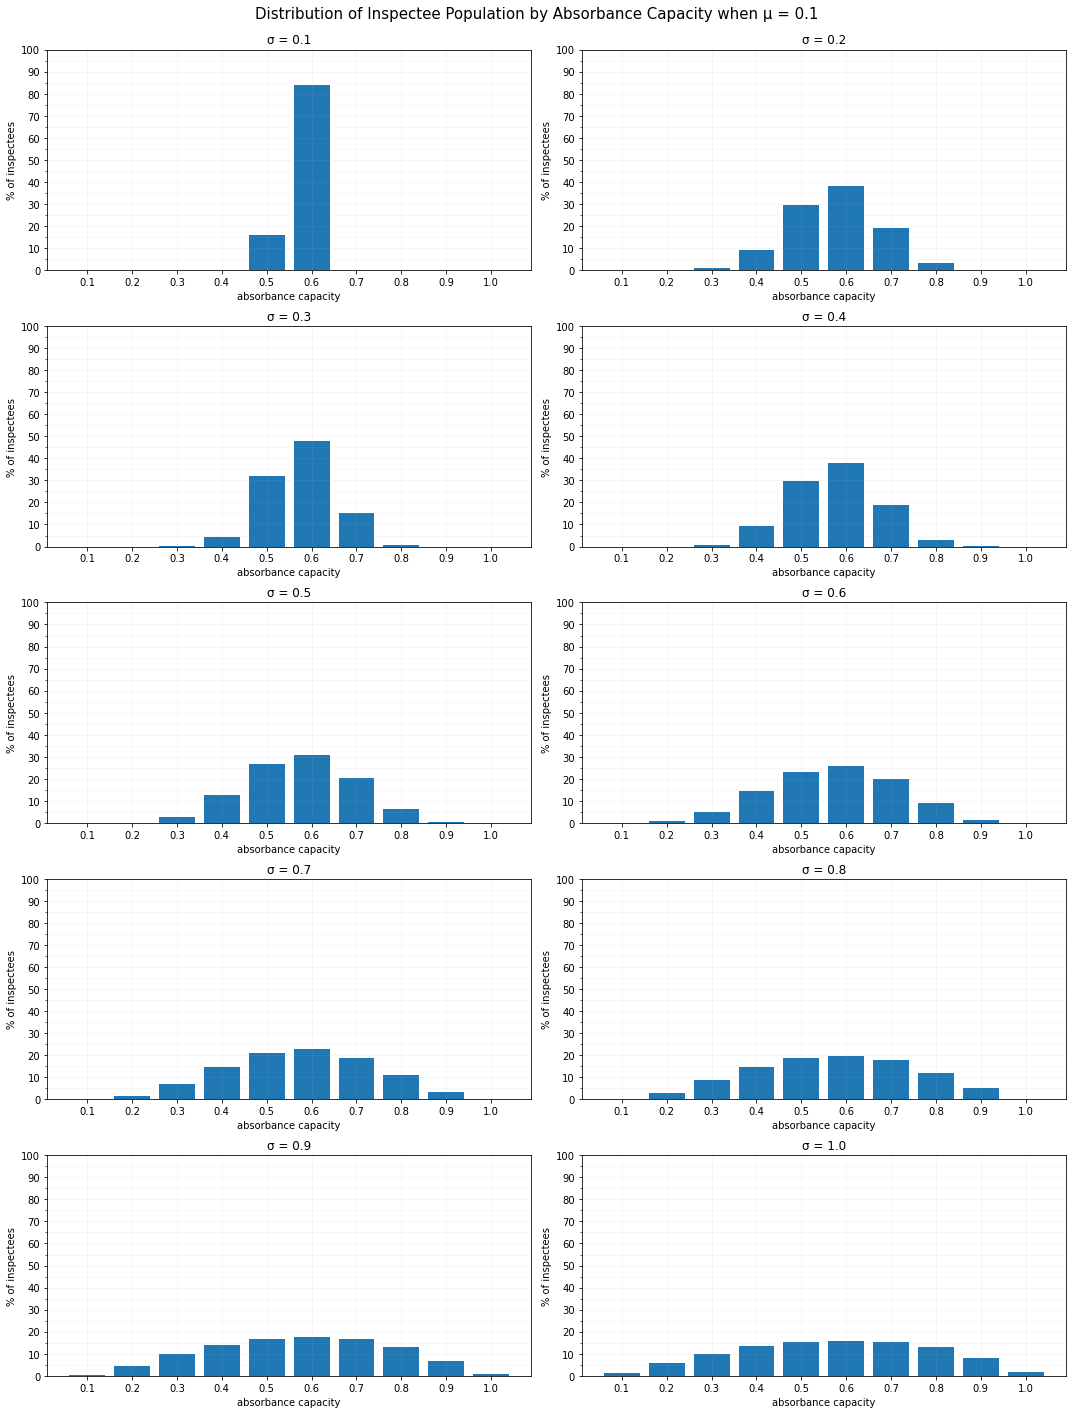

In [236]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_1_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_1_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_1_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_1_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_1_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_1_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_1_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_1_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_1_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_1_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.1',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.1.png', dpi=300, bbox_inches='tight') 

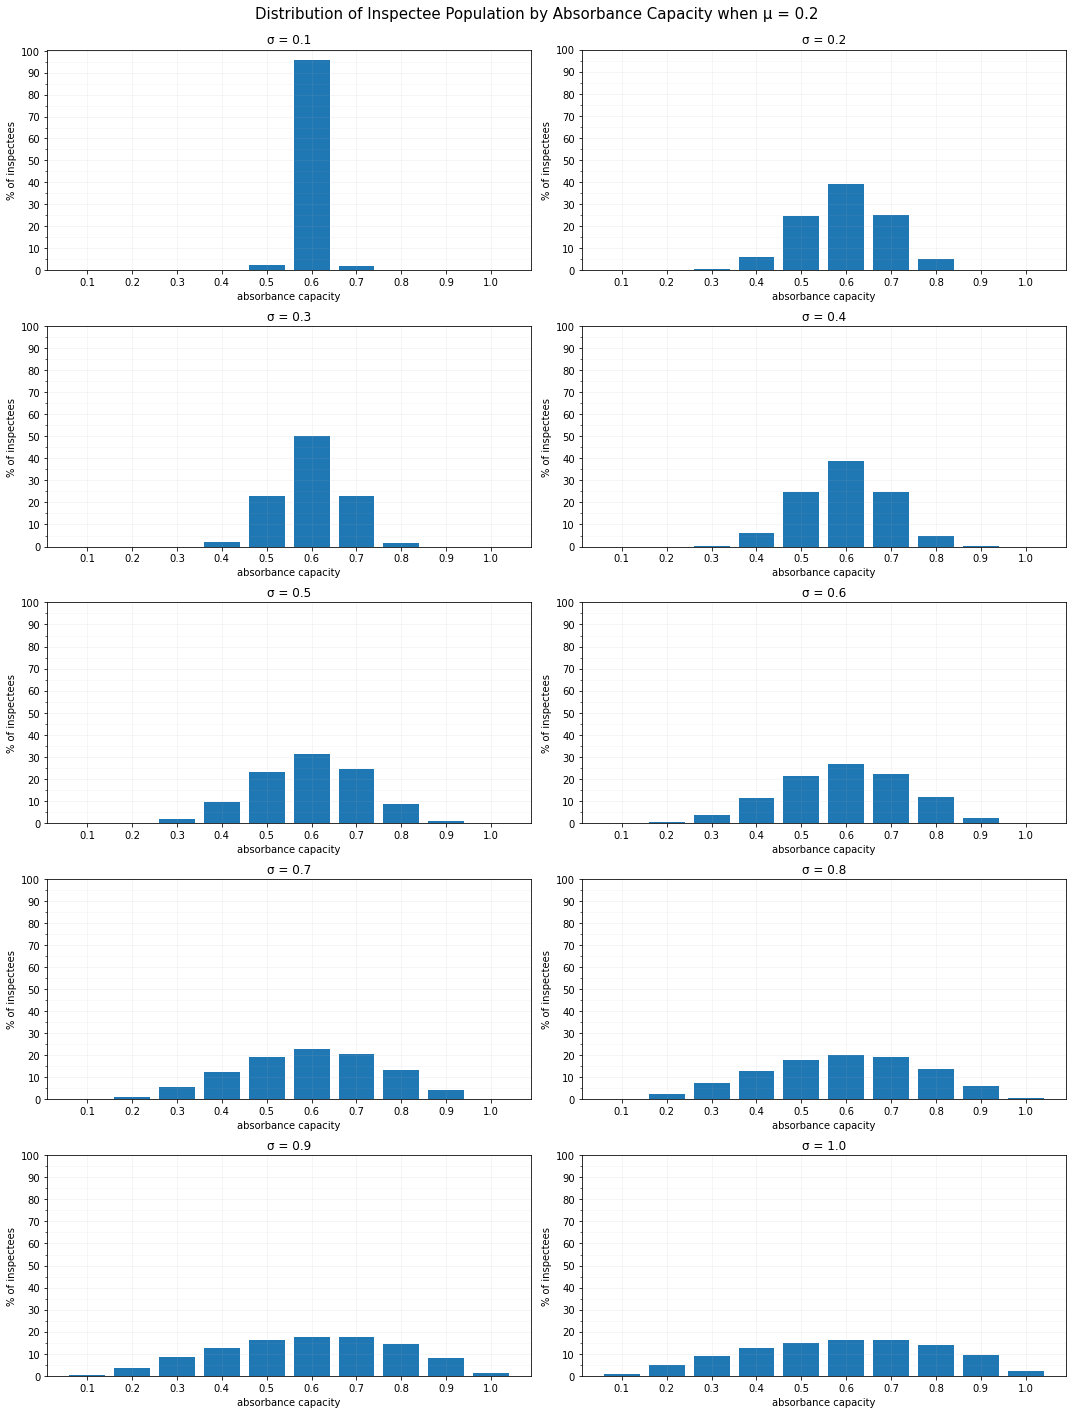

In [247]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_2_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_2_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_2_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_2_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_2_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_2_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_2_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_2_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_2_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_2_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.2',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.2.png', dpi=300, bbox_inches='tight') 

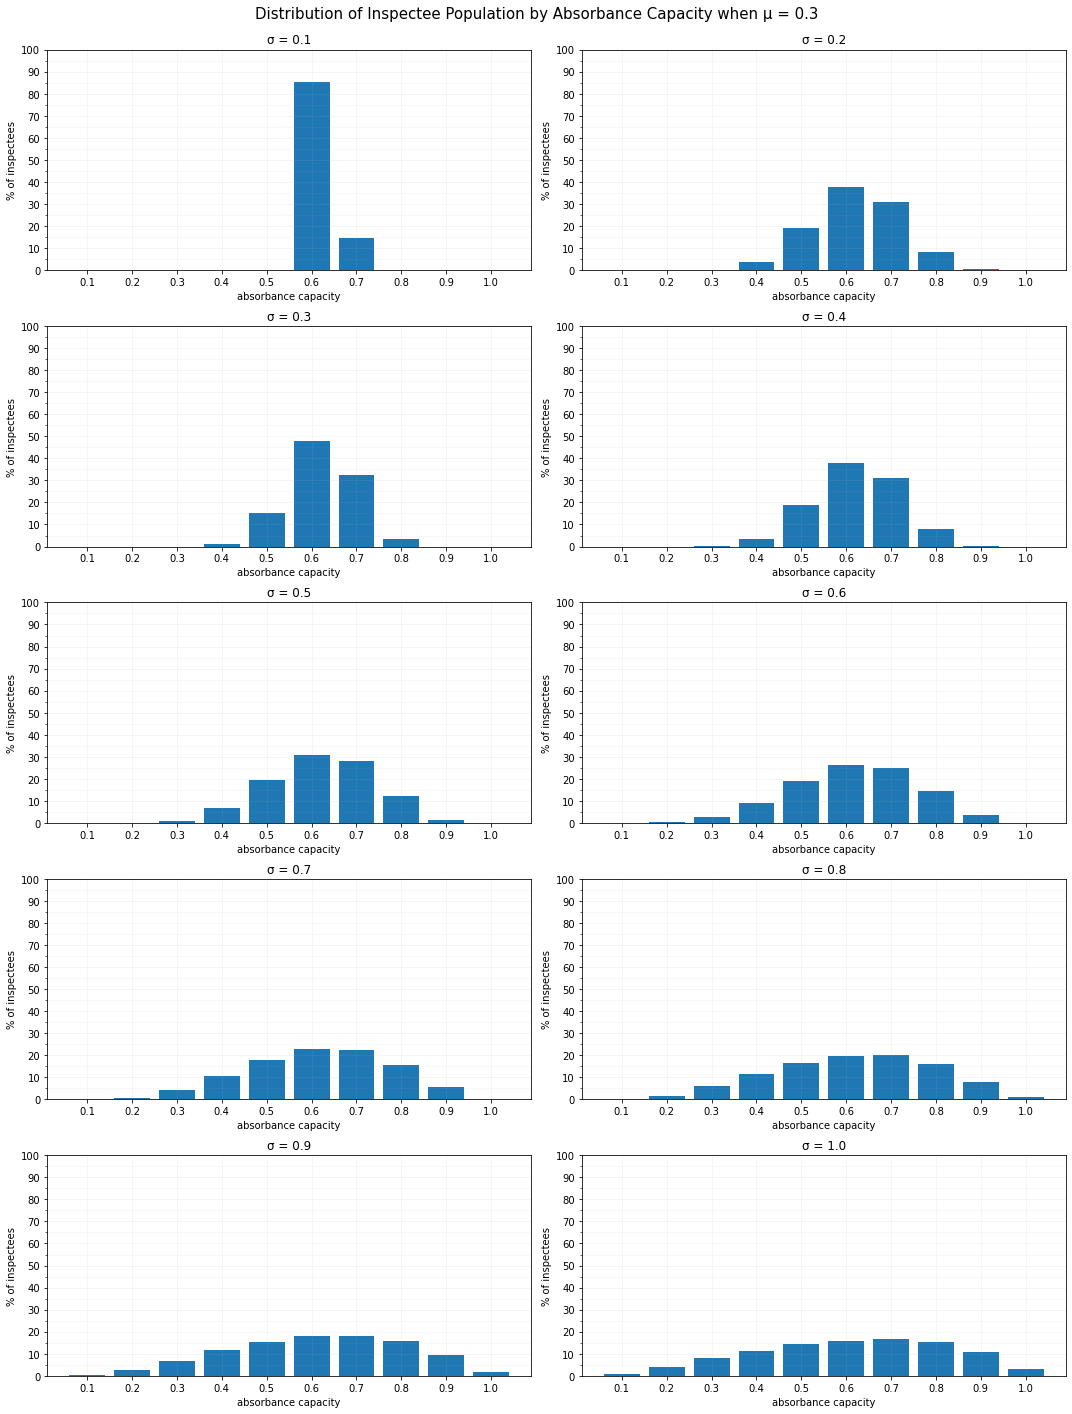

In [248]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_3_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_3_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_3_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_3_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_3_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_3_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_3_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_3_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_3_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_3_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.3',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.3.png', dpi=300, bbox_inches='tight') 

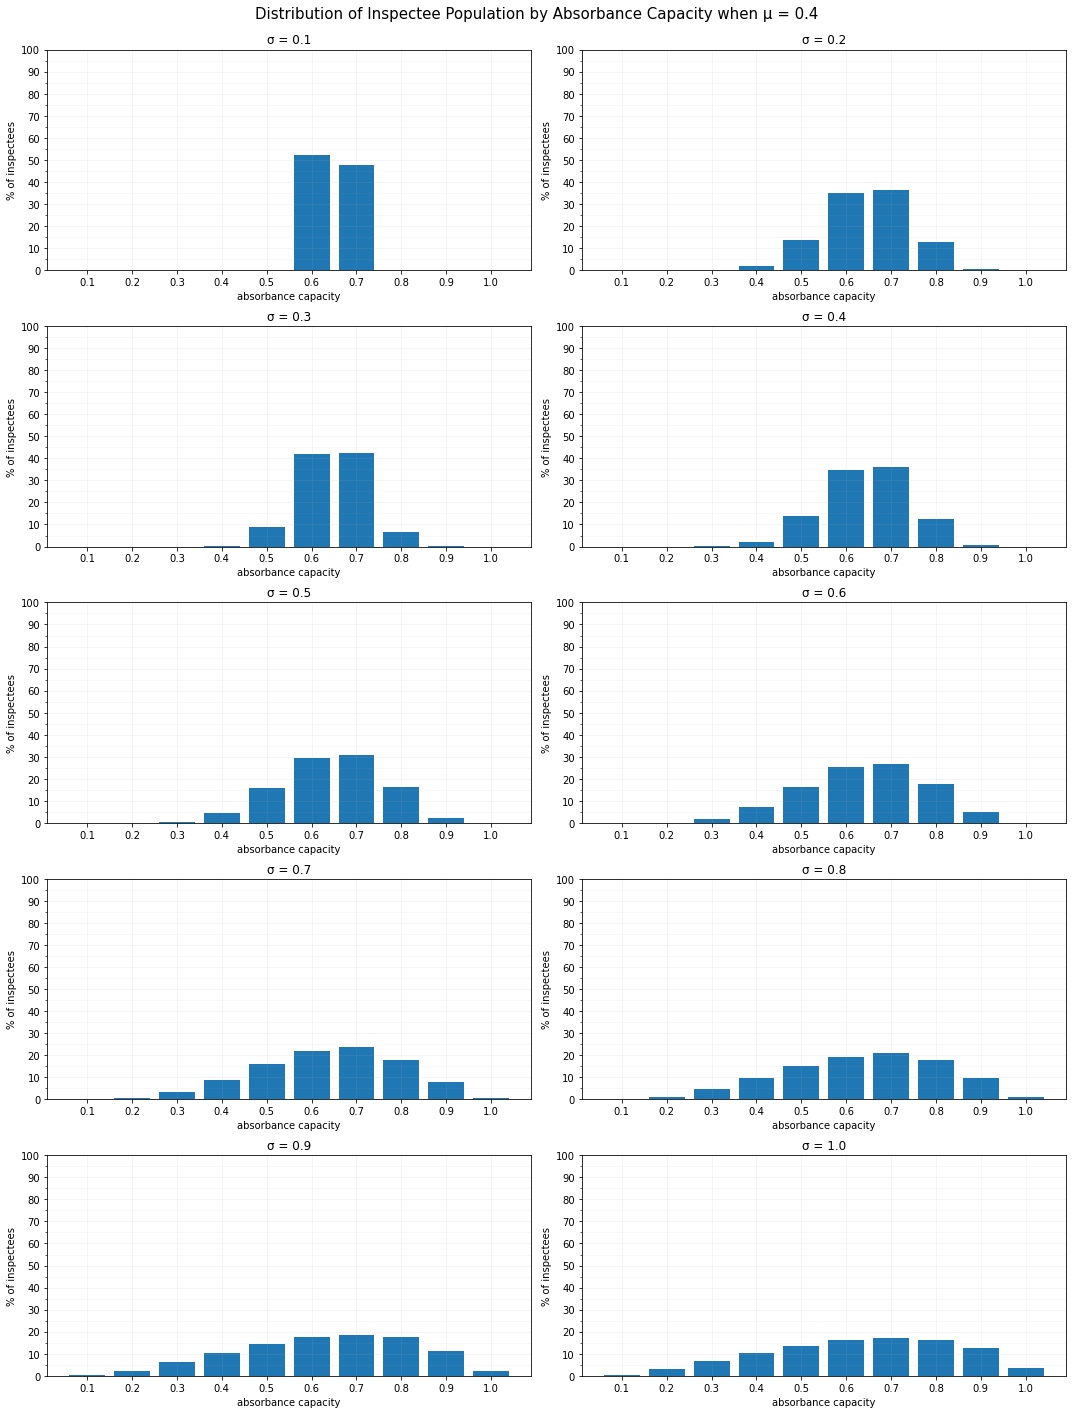

In [249]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_4_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_4_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_4_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_4_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_4_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_4_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_4_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_4_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_4_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_4_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.4',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.4.png', dpi=300, bbox_inches='tight') 

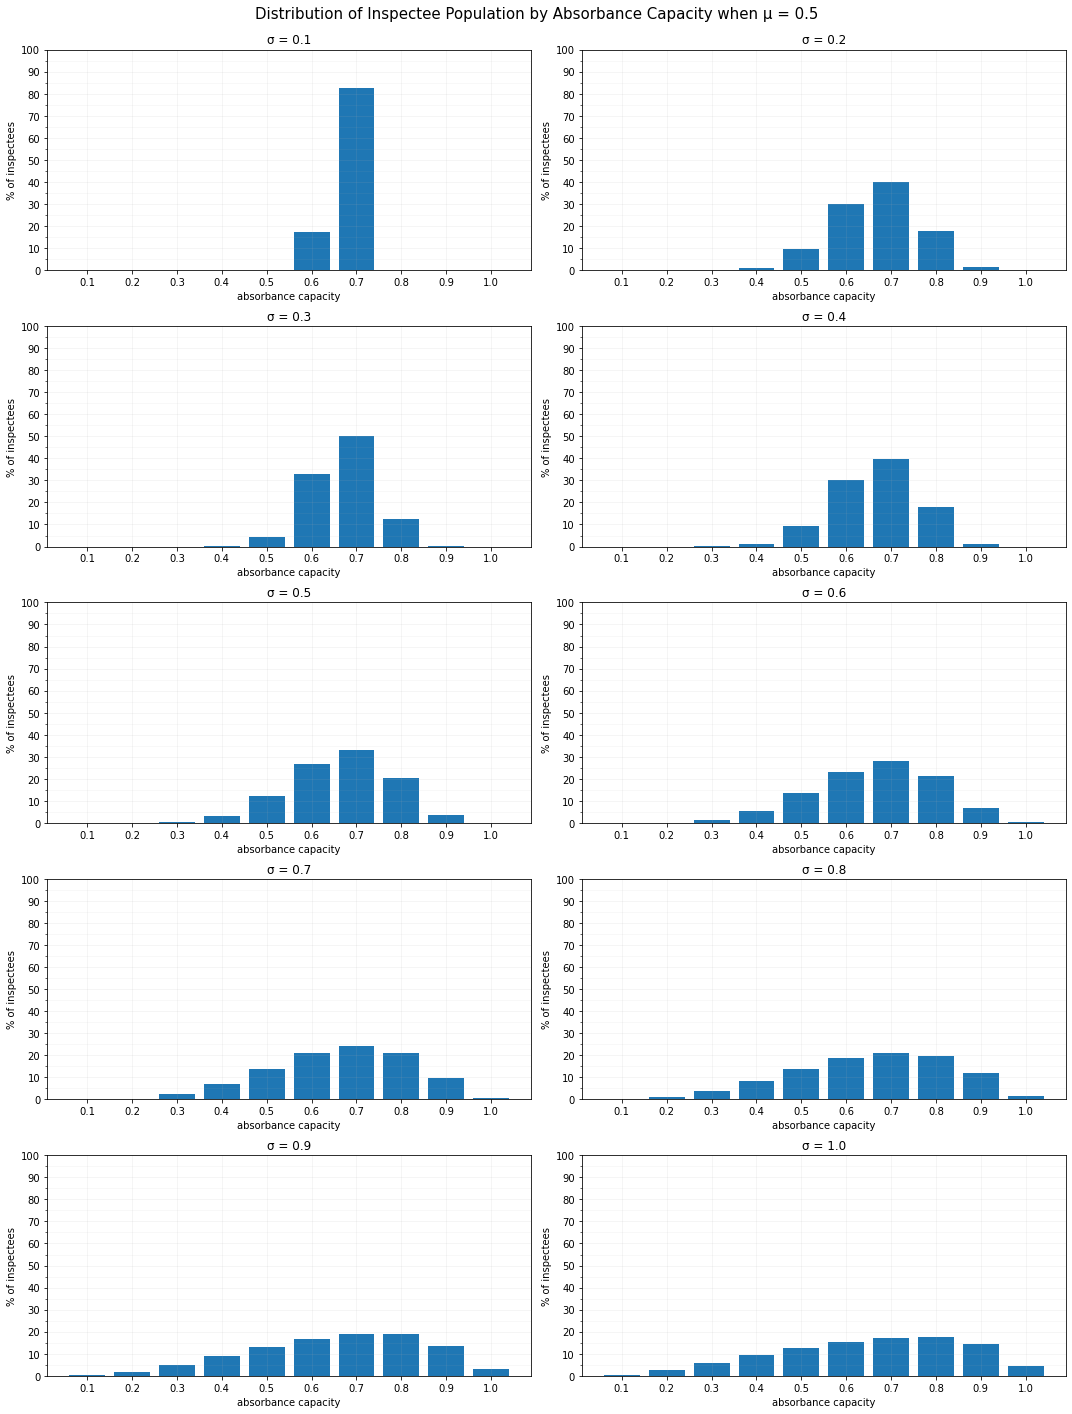

In [250]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_5_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_5_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_5_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_5_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_5_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_5_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_5_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_5_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_5_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_5_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.5',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.5.png', dpi=300, bbox_inches='tight') 

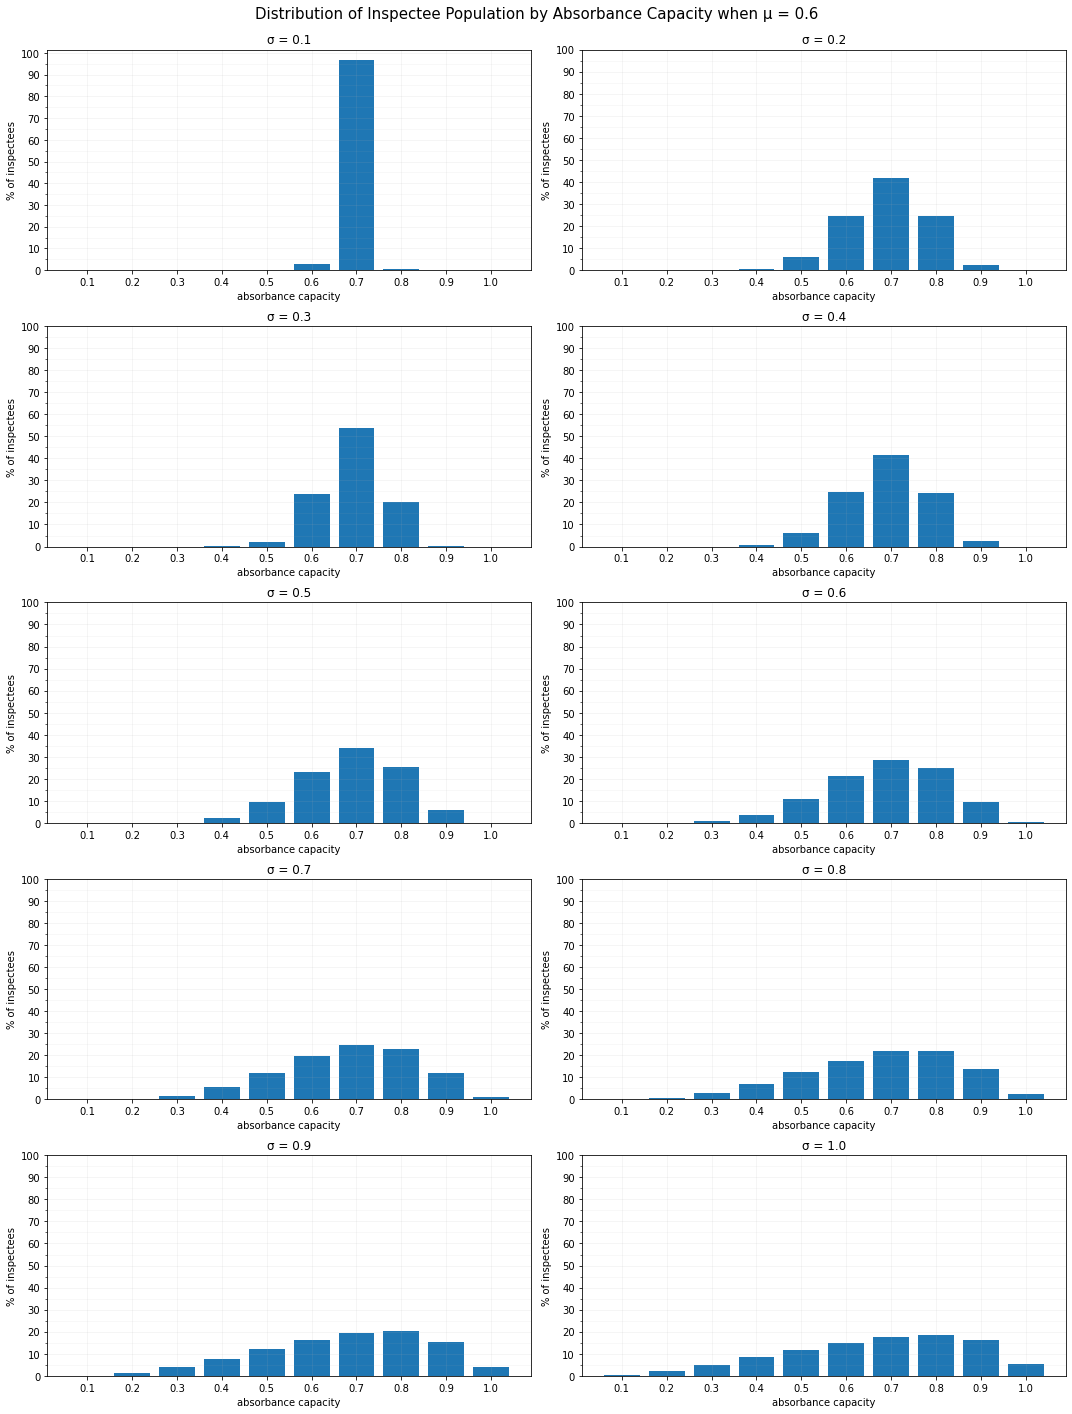

In [251]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_6_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_6_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_6_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_6_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_6_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_6_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_6_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_6_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_6_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_6_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.6',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.6.png', dpi=300, bbox_inches='tight') 

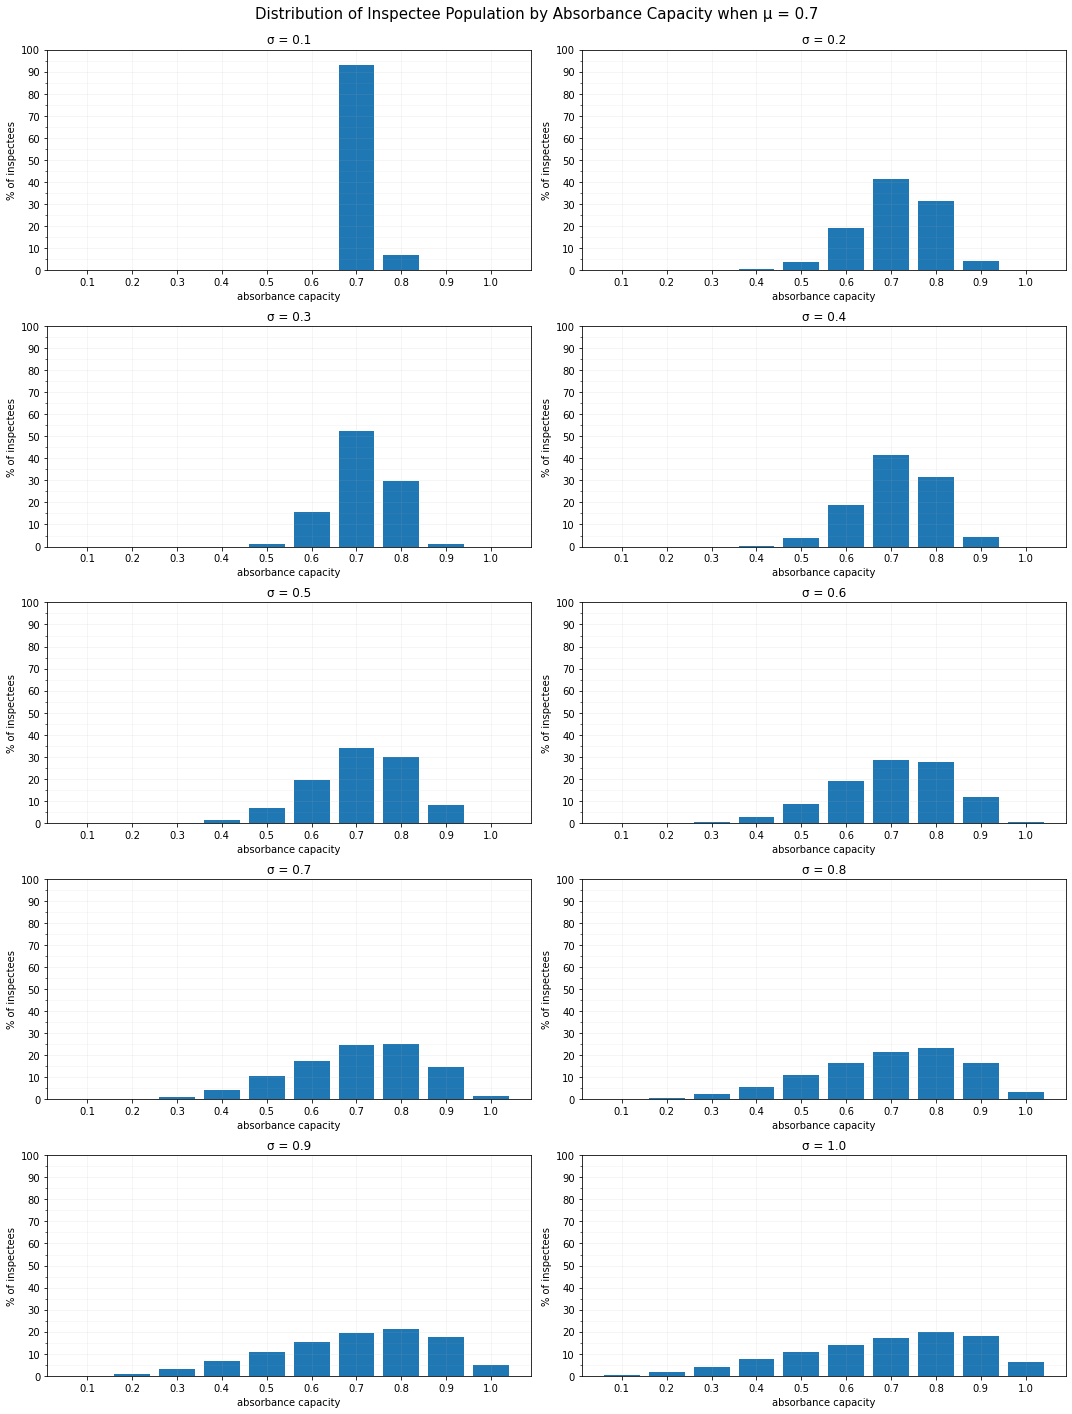

In [253]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_7_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_7_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_7_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_7_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_7_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_7_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_7_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_7_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_7_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_7_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.7',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.7.png', dpi=300, bbox_inches='tight') 

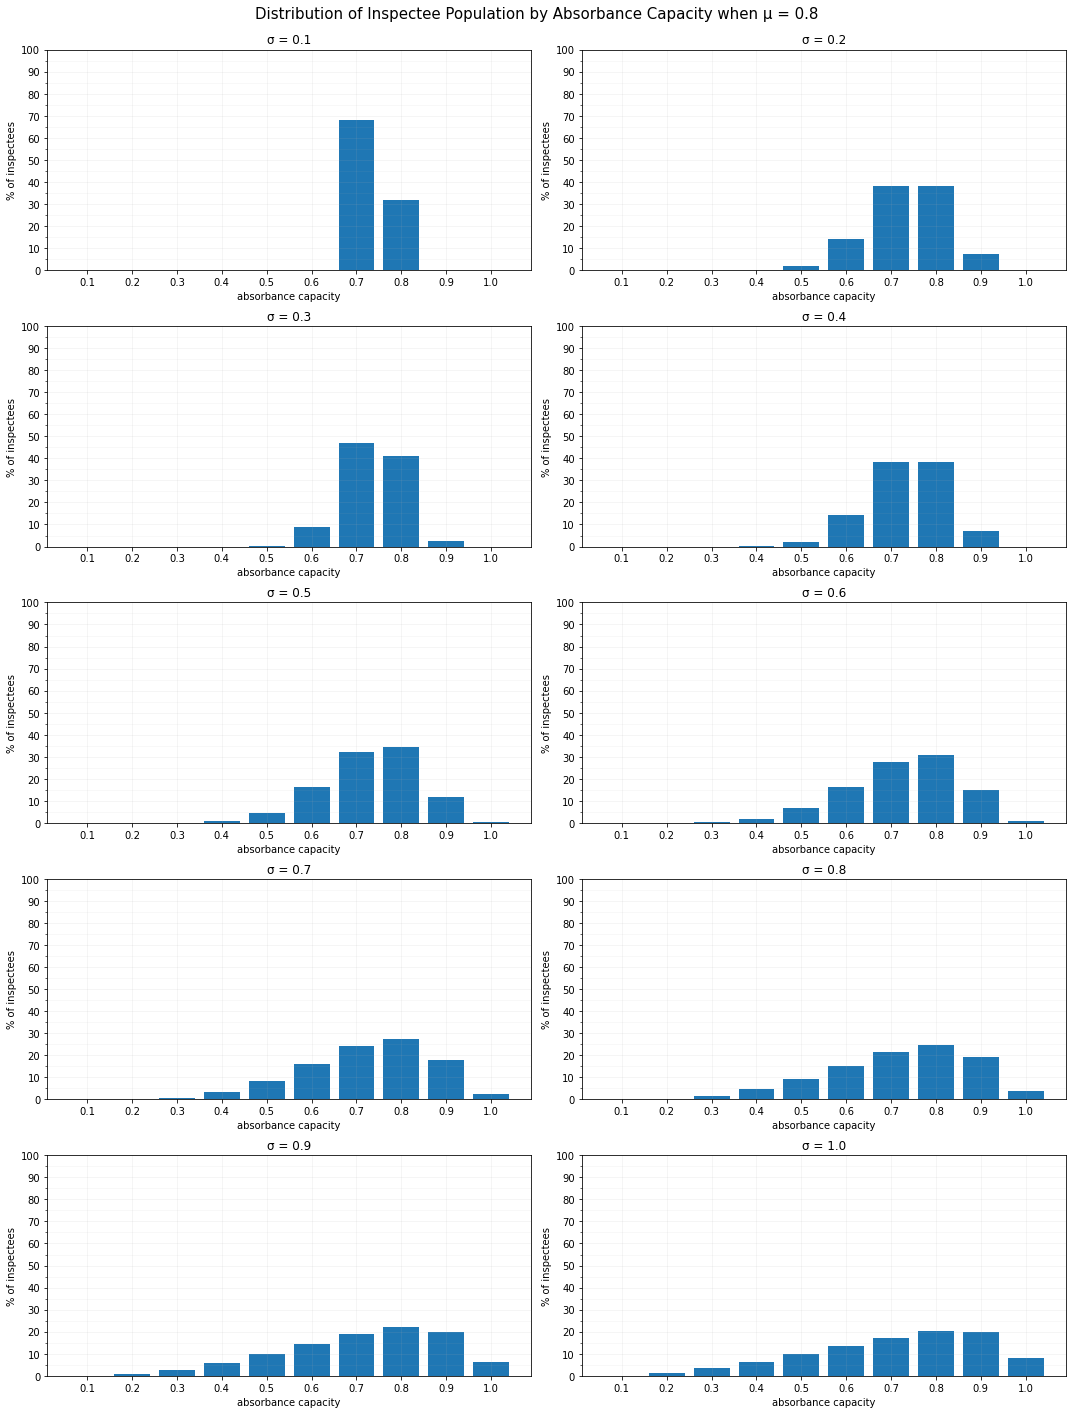

In [254]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_8_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_8_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_8_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_8_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_8_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_8_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_8_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_8_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_8_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_8_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.8',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.8.png', dpi=300, bbox_inches='tight') 

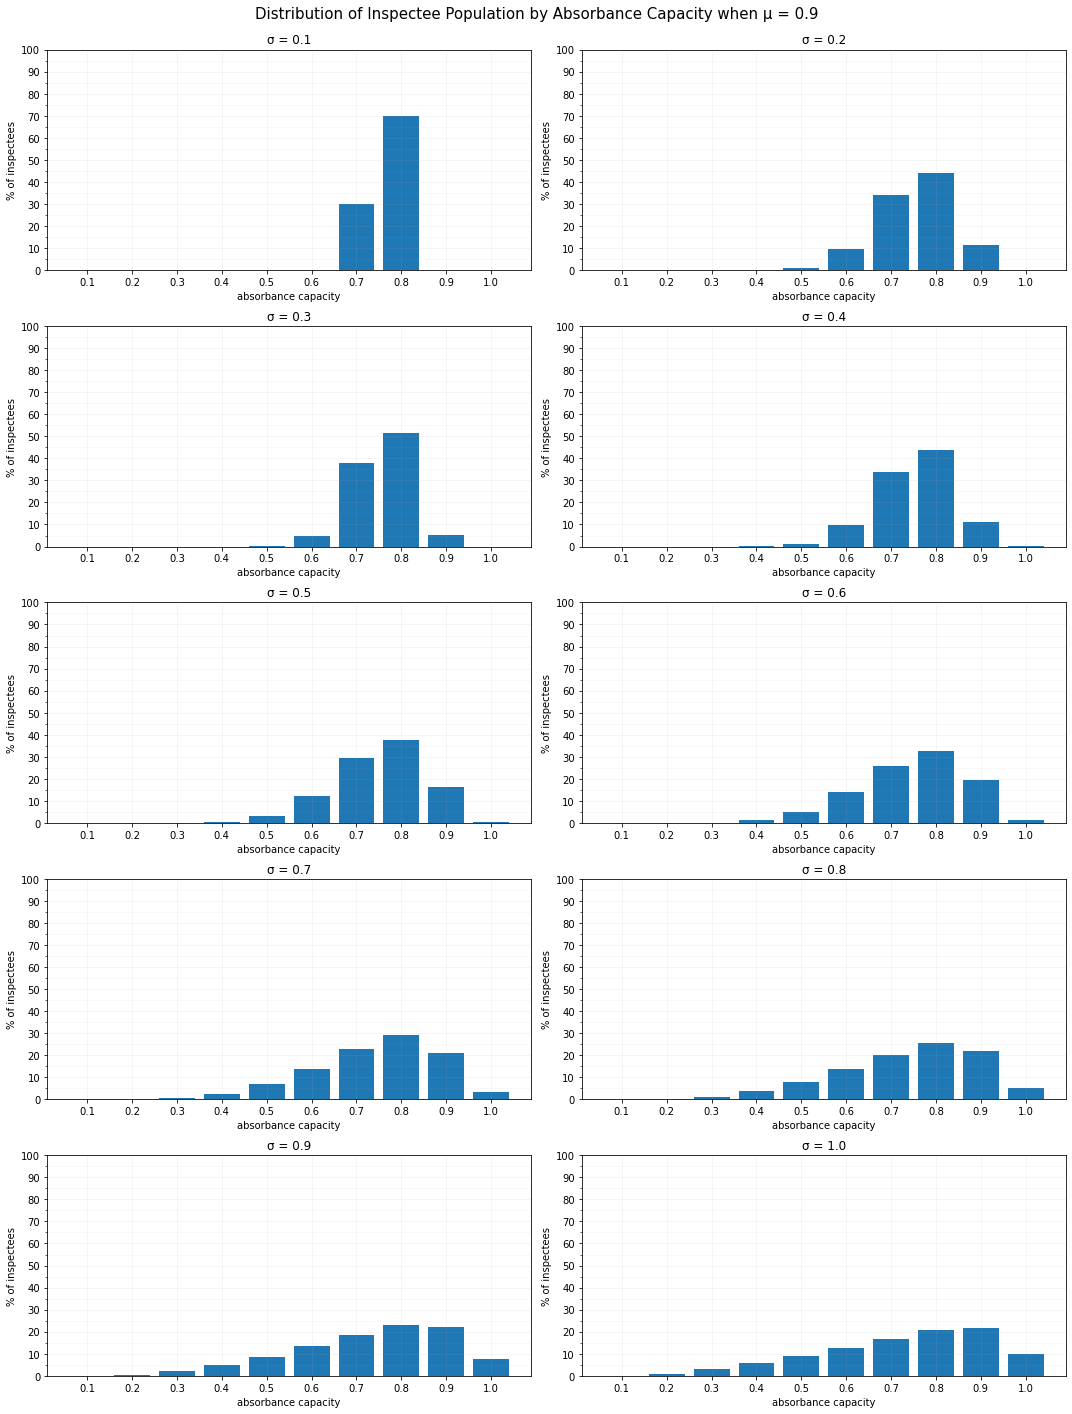

In [255]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_9_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_9_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_9_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_9_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_9_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_9_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_9_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_9_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_9_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_9_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 0.9',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 0.9.png', dpi=300, bbox_inches='tight') 

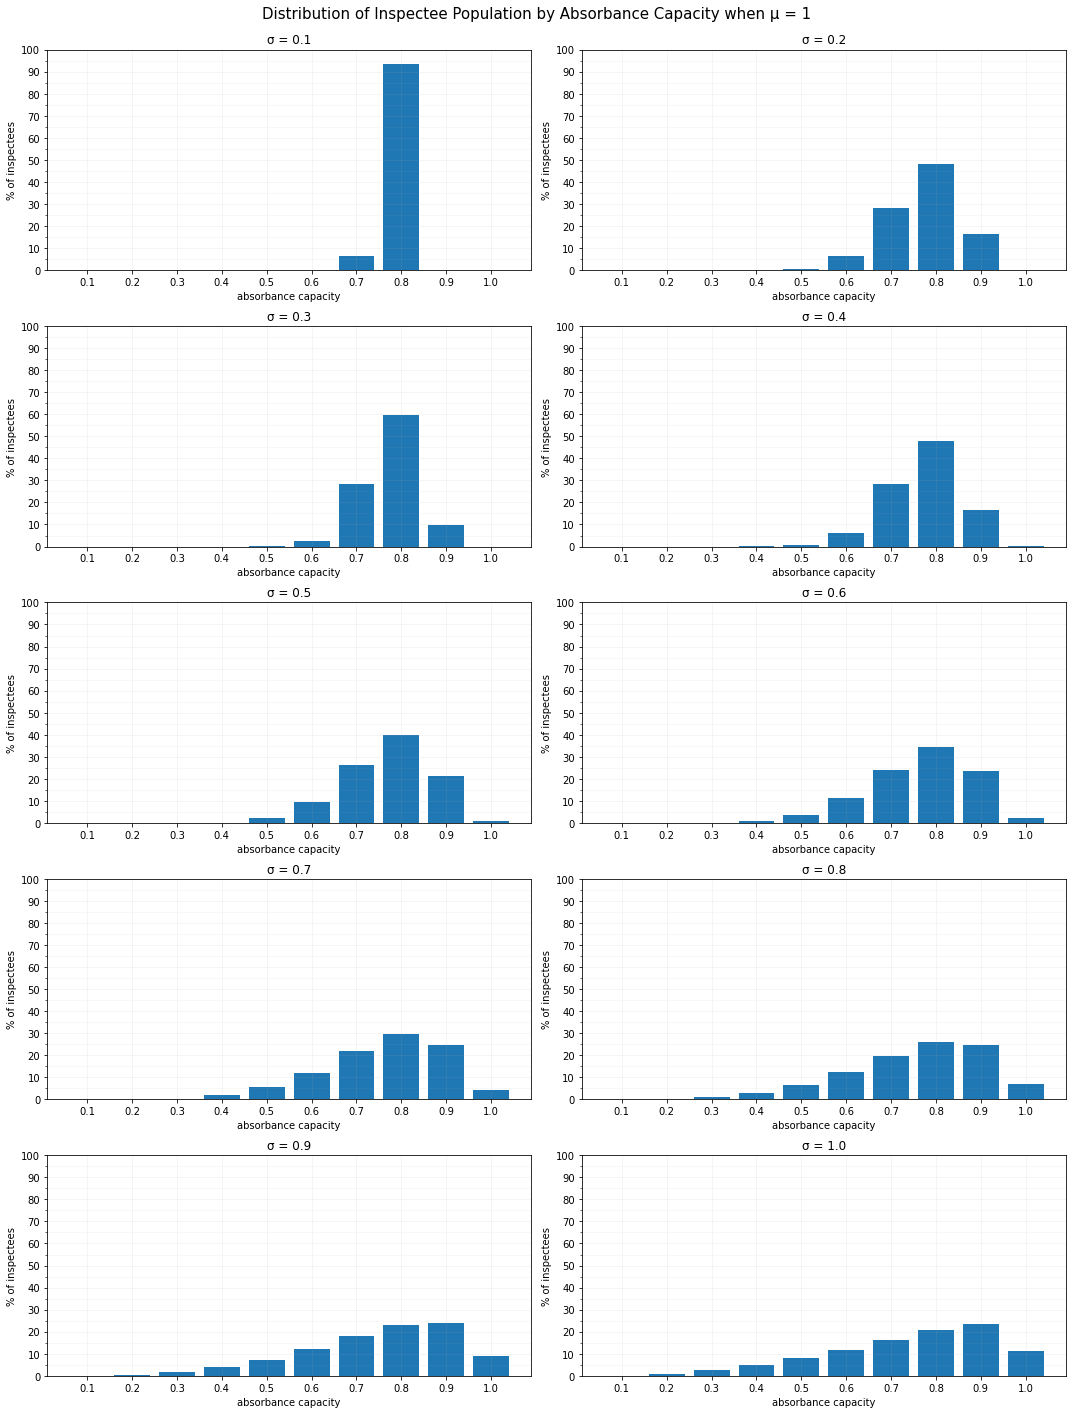

In [256]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
bars = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
y_pos = np.arange(len(bars))

axs[0, 0].bar(y_pos, agg_summary_logit_standard_10_1)
axs[0, 0].set_title("σ = 0.1")
axs[0, 0].set_xticks(y_pos)
axs[0, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 0].set_xlabel("absorbance capacity")
axs[0, 0].set_ylabel("% of inspectees")
axs[0, 0].grid(which='major', alpha=0.15)
axs[0, 0].grid(which='minor', alpha=0.1)
axs[0, 0].set_yticks(np.arange(0,100.1,10))
axs[0, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].bar(y_pos, agg_summary_logit_standard_10_3)
axs[1, 0].set_title("σ = 0.3")
axs[1, 0].set_xticks(y_pos)
axs[1, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 0].set_xlabel("absorbance capacity")
axs[1, 0].set_ylabel("% of inspectees")
axs[1, 0].grid(which='major', alpha=0.15)
axs[1, 0].grid(which='minor', alpha=0.1)
axs[1, 0].set_yticks(np.arange(0,100.1,10))
axs[1, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 0].sharex(axs[0, 0])
axs[0, 1].bar(y_pos, agg_summary_logit_standard_10_4)
axs[0, 1].set_title("σ = 0.2")
axs[0, 1].set_xticks(y_pos)
axs[0, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[0, 1].set_xlabel("absorbance capacity")
axs[0, 1].set_ylabel("% of inspectees")
axs[0, 1].grid(which='major', alpha=0.15)
axs[0, 1].grid(which='minor', alpha=0.1)
axs[0, 1].set_yticks(np.arange(0,100.1,10))
axs[0, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[1, 1].bar(y_pos, agg_summary_logit_standard_10_4)
axs[1, 1].set_title("σ = 0.4")
axs[1, 1].set_xticks(y_pos)
axs[1, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[1, 1].set_xlabel("absorbance capacity")
axs[1, 1].set_ylabel("% of inspectees")
axs[1, 1].grid(which='major', alpha=0.15)
axs[1, 1].grid(which='minor', alpha=0.1)
axs[1, 1].set_yticks(np.arange(0,100.1,10))
axs[1, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 0].bar(y_pos, agg_summary_logit_standard_10_5)
axs[2, 0].set_title("σ = 0.5")
axs[2, 0].set_xticks(y_pos)
axs[2, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 0].set_xlabel("absorbance capacity")
axs[2, 0].set_ylabel("% of inspectees")
axs[2, 0].grid(which='major', alpha=0.15)
axs[2, 0].grid(which='minor', alpha=0.1)
axs[2, 0].set_yticks(np.arange(0,100.1,10))
axs[2, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[2, 1].bar(y_pos, agg_summary_logit_standard_10_6)
axs[2, 1].set_title("σ = 0.6")
axs[2, 1].set_xticks(y_pos)
axs[2, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[2, 1].set_xlabel("absorbance capacity")
axs[2, 1].set_ylabel("% of inspectees")
axs[2, 1].grid(which='major', alpha=0.15)
axs[2, 1].grid(which='minor', alpha=0.1)
axs[2, 1].set_yticks(np.arange(0,100.1,10))
axs[2, 1].set_yticks(np.arange(0,100.1,5), minor=True)


axs[3, 0].bar(y_pos, agg_summary_logit_standard_10_7)
axs[3, 0].set_title("σ = 0.7")
axs[3, 0].set_xticks(y_pos)
axs[3, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 0].set_xlabel("absorbance capacity")
axs[3, 0].set_ylabel("% of inspectees")
axs[3, 0].grid(which='major', alpha=0.15)
axs[3, 0].grid(which='minor', alpha=0.1)
axs[3, 0].set_yticks(np.arange(0,100.1,10))
axs[3, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[3, 1].bar(y_pos, agg_summary_logit_standard_10_8)
axs[3, 1].set_title("σ = 0.8")
axs[3, 1].set_xticks(y_pos)
axs[3, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[3, 1].set_xlabel("absorbance capacity")
axs[3, 1].set_ylabel("% of inspectees")
axs[3, 1].grid(which='major', alpha=0.15)
axs[3, 1].grid(which='minor', alpha=0.1)
axs[3, 1].set_yticks(np.arange(0,100.1,10))
axs[3, 1].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 0].bar(y_pos, agg_summary_logit_standard_10_9)
axs[4, 0].set_title("σ = 0.9")
axs[4, 0].set_xticks(y_pos)
axs[4, 0].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 0].set_xlabel("absorbance capacity")
axs[4, 0].set_ylabel("% of inspectees")
axs[4, 0].grid(which='major', alpha=0.15)
axs[4, 0].grid(which='minor', alpha=0.1)
axs[4, 0].set_yticks(np.arange(0,100.1,10))
axs[4, 0].set_yticks(np.arange(0,100.1,5), minor=True)

axs[4, 1].bar(y_pos, agg_summary_logit_standard_10_10)
axs[4, 1].set_title("σ = 1.0")
axs[4, 1].set_xticks(y_pos)
axs[4, 1].set_xticklabels(["0.1","0.2","0.3","0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]) 
axs[4, 1].set_xlabel("absorbance capacity")
axs[4, 1].set_ylabel("% of inspectees")
axs[4, 1].grid(which='major', alpha=0.15)
axs[4, 1].grid(which='minor', alpha=0.1)
axs[4, 1].set_yticks(np.arange(0,100.1,10))
axs[4, 1].set_yticks(np.arange(0,100.1,5), minor=True)

fig.tight_layout()
fig.subplots_adjust(top=.95)
fig.suptitle('Distribution of Inspectee Population by Absorbance Capacity when \u03bc = 1',size=15)
plt.savefig('Distribution of Inspectee Population by Absorbance Capacity when mu = 1.png', dpi=300, bbox_inches='tight') 